# Explainer Notebook

# 1. Motivation

**What is your dataset?**

The main dataset can be downloaded on [kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). It holds information on **suicide rates** from **1985 to 2016** for **101 different countries in the world.** There are measurements regarding suicide rates for different **genders, age-groups** and **generations**  as well as yearly **GDP** for each measured country.

There are in total 12 features which are *country*, *year*, *sex*, *age*, *suicide_no*, *population*,  *suicides/100k pop*, *country-year*, *HDI for year*, *gdp\_for\_year\(\$\)*, *gdp\_per\_capita\(\$)* and *generation*. 

A few datasets will be joined to the suicide dataset to identify factors which impact the number of suicides per 100,000 population. All of whom can be found on the website <a href='http://data.un.org'>UNdata</a>. 

* First of all, information on the total [expenditure on health](http://data.un.org/Data.aspx?q=total+expenditure+on+health&d=WHO&f=MEASURE_CODE%3aWHS7_105) per capita for each country in dollars, *PPP\$*, will be joined to the suicide dataset.  To do so, a dataset from  WHO health statistics will be used which carries information on *PPP\$* for 192 countries from 1995-2012.  In total there are 93 countries in common with the suicide data.


* Similarly,  information on [*educational index*](http://hdr.undp.org/en/data?fbclid=IwAR1MddXcG-3CVvIKPrYOHFw6lcUXOskWaCEx7We1Xc3odFH-FdQt4J7vsts#) for 192 nations from 1990-2015 of whom 93 are in common with the suicides data will be used.


* Then the percentage of [Internet Users](http://data.un.org/Data.aspx?q=internet+users&d=SOWC&f=inID%3a72), *intusers\%*, per country for 213 countries from 1960-2014 of which 93 are in common with the original data will be merged.


* Finally,  a fraction of [woman labour](http://data.un.org/Data.aspx?q=women+labor&d=GenderStat&f=inID%3a107) over the age of 17, *flabor\%*, per country for 189 countries from 1985-2006 of which 81 countries are in common with the suicide data will be joined.

At first, the main focus will be on suicides rates per 100,000 population since the additional datasets do not cover all countries. Then each dataset, described above will be joined to the suicide dataset. Finally, all datasets will be joined which results in 76 distinct countries from 1995-2006.


**Why did you choose this/these particular dataset(s)?**

Recently, the discussion of suicides has become less of taboo. Even though it is a depressing subject, it can be interesting to dive deep into the possible risk factors behind suicides and external condition that might be a trigger.

The information at hand could shed light on patterns that lie within the suicides over 30 years. It is of great interest to investigate these patterns and possible causing factors which might be acquired from the additional datasets.

**What was your goal for the end user's experience?**

The goal is to inform the end users about the earlier mention patterns within suicides and possible triggers.
 
A user should become aware of the relation between the status of a country and suicide rates. A status of a nation can be due to the GDP, the PPP, the educational index, the fraction of internet users, fraction of woman in labour over the age of 17, etc. The user will become aware of the possible correlations and co-correlations between those factors and suicide rates. 

Then the user should become familiar to the differences, if any, within the population of the countries in connection to suicides. He should identify whether different gender groups,  age groups or generation groups are in more risk of committing suicide.

Finally, the user should get some idea about how the suicide rates will develop over the next few years.

# 2. Basic Stats

## **Write about your choices in data cleaning and preprocessing.**

The *HDI for year* column will be dropped from the suicide dataset, as 67\% of its values are *NULL* (see code below). The *country-year* column can be derived from other columns and therefore dropped. The analysis of the suicide data will be limited to the years 1985 - 2015, as the year 2016 has insufficient data.  Finally, *suicides_no* and *gpd_for_year* will be dropped since the information is also available in other features corrected for 100,000 capita which is more suitable for comparison.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pyc
%matplotlib inline 

In [2]:
'''
Read the Suicide data 
'''
df = pd.read_csv("master.csv")
print('View suicide data: \n',df.sample(4))

View suicide data: 
            country  year     sex          age  suicides_no  population  \
15714     Maldives  2002    male  35-54 years            1       24087   
5747      Colombia  1994    male  25-34 years          247     3094400   
21510  Saint Lucia  2003  female  55-74 years            0        7937   
5318         Chile  1989  female  15-24 years           26     1228000   

       suicides/100k pop     country-year  HDI for year  gdp_for_year ($)   \
15714               4.15     Maldives2002           NaN        897,031,250   
5747                7.98     Colombia1994           NaN     81,703,500,846   
21510               0.00  Saint Lucia2003           NaN        823,837,141   
5318                2.12        Chile1989           NaN     29,885,685,143   

       gdp_per_capita ($)    generation  
15714                3401       Boomers  
5747                 2646       Boomers  
21510                5599        Silent  
5318                 2599  Generation X  


The reason for dropping the column HDI for year is due to the number of not a number values:

In [3]:
'''
Identify the fraction of null values per column and modify
'''

nulls = df.isnull().sum()/len(df.index)*100
print('Fraction of NaN values in columns: \n', nulls)

Fraction of NaN values in columns: 
 country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64


As can be seen below, 2016 has much fewer observations than the earlier years. Therefore, the data from 2016 is considered insufficient and dropped. 

In [4]:
df.groupby('year').count().tail(5)

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,,
2012,972,972,972,972,972,972,972,936,972,972,972
2013,960,960,960,960,960,960,960,924,960,960,960
2014,936,936,936,936,936,936,936,900,936,936,936
2015,744,744,744,744,744,744,744,0,744,744,744
2016,160,160,160,160,160,160,160,0,160,160,160


In [5]:
# Get convenient columns
df = df[['country','year','sex','age','population', 'suicides/100k pop', 'suicides_no', 'gdp_per_capita ($)', 'generation']]
df = df[df['year']!=2016]

A 'Continent' column will be added to the dataset as it is interesting to see how the different continents compare to one another. For this,  the package [pycountry_convert](https://pypi.org/project/pycountry-convert/) will be used. 

In [6]:
#Lets put the continents in the dataset.

#Some names need to be changed, as they appear differently within libraries.
def change_country_name(country):
    if(country == 'Republic of Korea'):
        return 'North Korea'
    elif(country == 'Saint Vincent and Grenadines'):
        return 'Saint Vincent and the Grenadines'
    else:
        return country

def get_continent(country):
    alpha2 = pyc.country_name_to_country_alpha2(country)
    return pyc.country_alpha2_to_continent_code(alpha2)

df['country'] = df['country'].map(change_country_name)
df['Continent'] = df['country'].map(get_continent)

**Adding the PPP**

For the PPP, all columns with years in the range of the years of the suicidal data will be joined to the original dataset and rows including NaN deleted. This will enable evaluations on how the total spending of a country per capita in the health system affects suicide rates.

In [7]:
'''
Read and clean and modifying PPP
'''
health = pd.read_csv('PPPhealth.csv', encoding= 'ISO-8859-1')

#clean
health = health.drop(['Value Footnotes'], axis=1)
health = health.rename(index=str, columns={'Country or Area':'country', 'Year(s)':'year', 'Value':'PPP$'})

#Merge educational index to suicidedata
h_Sui = df.merge(health ,on = ['country','year']) 

#Identify NaN
nulls = h_Sui.isnull().sum()/len(h_Sui.index)*100
print('No NaN!\n')

print('Merged PPP and Suicide data \n', h_Sui.sample(2))

No NaN!

Merged PPP and Suicide data 
         country  year     sex          age  population  suicides/100k pop  \
1616    Bahrain  2003  female    75+ years        2946               0.00   
14397  Slovenia  2000  female  25-34 years      143055               7.69   

       suicides_no  gdp_per_capita ($)    generation Continent    PPP$  
1616             0               15756        Silent        AS   925.9  
14397           11               10783  Generation X        EU  1451.7  


**Adding the educational index**

For the educational index, all columns except the years which were in the range of the suicidal data, country and educational index will be dropped. T The educational index is in a specific column which is to be modified to make it joinable to the suicide data. Afterwards, null rows will be deleted.

In [8]:
'''
Read and clean and modifying Educational Index Data
'''
df_ei = pd.read_csv('Education Index.csv', encoding= 'ISO-8859-1')

#clean
df_ei.dropna(axis=0, how='all')
df_ei.drop(df_ei.columns[df_ei.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True) #Remove nan index due to bad separators
df_ei = df_ei.drop(['HDI Rank (2017)'], axis = 1)

#modify
years = df_ei.columns[1:]
countries = df_ei.Country.unique()
df_ei_new = []

for country in countries:
    for year in  years:
        ei = df_ei[df_ei['Country']==country][year].values
        if len(ei) > 0: 
            item = {'country':str(country).strip(), 'year':np.int(year), 'educational Index':ei[0]}
        else:
            item = {'country':str(country).strip(), 'year':np.int(year), 'educational Index':""}
        df_ei_new.append(item)

df_ei_new = pd.DataFrame(df_ei_new)


#Merge educational index to suicidedata
e_Sui = df.merge(df_ei_new ,on = ['country','year']) 


#Identify NaN
nulls = e_Sui.isnull().sum()/len(e_Sui.index)*100
print('Fraction of NaN values in columns: \n', nulls)

#Drop NaN
e_Sui = e_Sui.dropna()
print('View educational index merged to suicidedata \n', e_Sui.sample(2))

Fraction of NaN values in columns: 
 country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
population            0.000000
suicides/100k pop     0.000000
suicides_no           0.000000
gdp_per_capita ($)    0.000000
generation            0.000000
Continent             0.000000
educational Index     6.128703
dtype: float64
View educational index merged to suicidedata 
                   country  year     sex          age  population  \
13449          Luxembourg  2014  female  35-54 years       84147   
17430  Russian Federation  1993  female  55-74 years    16579000   

       suicides/100k pop  suicides_no  gdp_per_capita ($)    generation  \
13449               3.57            3              126352  Generation X   
17430              20.71         3433                3160        Silent   

      Continent educational Index  
13449        EU             0.783  
17430        EU             0.658  


**Adding the fraction of internet users**

For the fraction of internet users, all columns except the years in the range of the suicidal data will be dropped and merged to the suicidal dataset.

In [9]:
'''
Read and clean and modifying fraction of internet users
'''
internet = pd.read_csv('internetusers.csv', encoding= 'ISO-8859-1')

#clean
internet = internet.drop(['Value Footnotes'], axis=1)
internet = internet.rename(index=str, columns={'Country or Area':'country', 'Year':'year', 'Value':'intusers%'})

#Merge educational index to suicidedata
i_Sui = df.merge(internet ,on = ['country','year']) 
print('View educational index merged to suicidedata \n', i_Sui.sample(2))

View educational index merged to suicidedata 
          country  year     sex          age  population  suicides/100k pop  \
18551     Sweden  2009    male   5-14 years      514747               0.58   
476    Argentina  1997  female  15-24 years     3161000               3.57   

       suicides_no  gdp_per_capita ($)    generation Continent  intusers%  
18551            3               49070  Generation Z        EU   91.00000  
476            113                9057  Generation X        SA    0.28034  


**Adding the fraction of woman in labour over the age of 17**

For a fraction of woman in labour over the age of 17, all columns except the years which were in the range of the suicidal data will be dropped ad-bd merged to the suicidal dataset.

In [10]:
'''
Read and clean and modifying fraction of woman in labour
'''
woman = pd.read_csv('womenlabor.csv', encoding= 'ISO-8859-1')

#clean
woman = woman[['Country or Area','Year','Value']]
woman = woman.rename(index=str, columns={'Country or Area':'country', 'Year':'year', 'Value':'flabor%'})

#Merge educational index to suicidedata
w_Sui = df.merge(woman ,on = ['country','year']) 
print('View educational index merged to suicidedata \n', w_Sui.sample(2))

View educational index merged to suicidedata 
         country  year     sex          age  population  suicides/100k pop  \
714   Australia  1989  female    75+ years      451800               6.86   
3579      Chile  2002    male  25-34 years     1250576              23.67   

      suicides_no  gdp_per_capita ($)       generation Continent  flabor%  
714            31               19223  G.I. Generation        OC     40.8  
3579          296                4866     Generation X        SA     33.5  


**Merging all datasets**

In [11]:
#merge first
eh_Sui = h_Sui.merge(e_Sui ,on = ['country','year'], left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y')) 
cols = [x for x in eh_Sui.columns if x[-2:] != '_y']
eh_Sui = eh_Sui[cols]

#merge second
ehi_Sui = eh_Sui.merge(i_Sui ,on = ['country','year'], left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y')) 
cols = [x for x in ehi_Sui.columns if x[-2:] != '_y']
ehi_Sui = ehi_Sui[cols]

#merge all
all_Sui = ehi_Sui.merge(w_Sui ,on = ['country','year'], left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y')) 
cols = [x for x in all_Sui.columns if x[-2:] != '_y']
all_Sui = all_Sui[cols]

print('View 2 rows of all data \n', all_Sui.sample(2))
print('The number of distinct coutries is:', len(all_Sui.country.unique().tolist()))
print('Available years are:', all_Sui.year.unique().tolist())

View 2 rows of all data 
       country  year   sex          age  population  suicides/100k pop  \
8326  Jamaica  2001  male   5-14 years    288148.0               0.00   
5330  Estonia  2002  male  35-54 years    184685.0              63.35   

      suicides_no  gdp_per_capita ($)  generation Continent   PPP$  \
8326          0.0              3838.0  Millenials        NA  313.1   
5330        117.0              5561.0     Boomers        EU  570.6   

     educational Index  intusers%  flabor%  
8326             0.872    59.8663     37.2  
5330             0.558    30.0000     39.7  
The number of distinct coutries is: 94
Available years are: [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2012, 2011, 2013, 2014, 2015, 1990, 1991, 1992, 1993, 1994]


**Dataset having countries with all years represented**

To make sure increaesment and decresement over the years of suicides per 100,000 capita are not over- nor underestimated it is essential that there exist yearly measurements for the counties in the comparisons.

In [12]:
'''
Create dataframe with countries which have measurements for all of the years.
'''
all_year_df = []

total = df.groupby(['country','year'])['suicides/100k pop'].sum().reset_index()

for c in df.country.unique(): 
    temp = total.loc[(total['country'] == c)]
    # make sure it is sorted for time series pred
    tempSort = temp[['suicides/100k pop','year']].sort_values('year').reset_index(drop=True)
    years = tempSort['year'].unique().tolist()
    # test if all years
    test_years = list(range(1985,2016))
    s_s = tempSort['suicides/100k pop'].tolist()
    y_s  = tempSort['year'].tolist()
    if years == test_years:
        for i, y in enumerate(y_s):
            all_year_df.append({'country': c, 'year':y_s[i], 'suicides/100k pop':s_s[i]})

            
all_year_df = pd.DataFrame(all_year_df)

print('Dataframe where all years are included: \n', all_year_df.head())

print('Number of countries with data from 1990-2015: \n', len(all_year_df.country.unique().tolist()))

Dataframe where all years are included: 
      country  suicides/100k pop  year
0  Argentina             134.47  1985
1  Argentina             152.90  1986
2  Argentina             144.98  1987
3  Argentina             146.24  1988
4  Argentina             138.93  1989
Number of countries with data from 1990-2015: 
 23


In [13]:
countries_all_Sui = all_Sui.country.unique().tolist()
countries_all_year = all_year_df.country.unique().tolist()
common = list(set(countries_all_Sui).intersection(countries_all_year))
print('Countries in common with the all years dataframe and all features dataframe are the following: \n', common, '\n And the total length is\n' ,len(common))

Countries in common with the all years dataframe and all features dataframe are the following: 
 ['Japan', 'Greece', 'Ecuador', 'Spain', 'Italy', 'Iceland', 'Israel', 'Austria', 'United States', 'Argentina', 'Colombia', 'Mexico', 'Luxembourg', 'Chile', 'Netherlands', 'Malta', 'Mauritius', 'Singapore', 'United Kingdom', 'Belgium', 'Brazil'] 
 And the total length is
 21


There are only 23 countries that have observations over the whole period from 1985-2016. Which is not a lot meaning there is a trade-off between having data covering the entire time range and data for all 101 counties. This will be investigated further in the following sections.

## **Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**

As a start, it is interesting to see the distribution of total and average suicides per 100,000 capita over the year. First we will create a bar chart which shows the number of distinct countries in the yearly data. Then the impacts of inspecting the whole suicide dataset and the dataset for countries having data for all years from 1985-2015 will be investigated. As can be seen, the upper plot which includes the whole dataset seems to be highly dependent on the number of countries each year as the distribution ensembles the distribution of the bar chart. The development for the whole data is not even similar to the trend for the countries including all years. Therefore, one must be careful to compare accumulated yearly data due to the lack of measurements for some years. 
It can also been seen that it is vital to have data for the countries every year to evaluate the trend in suicides.

Text(0,0.5,'Number of countries')

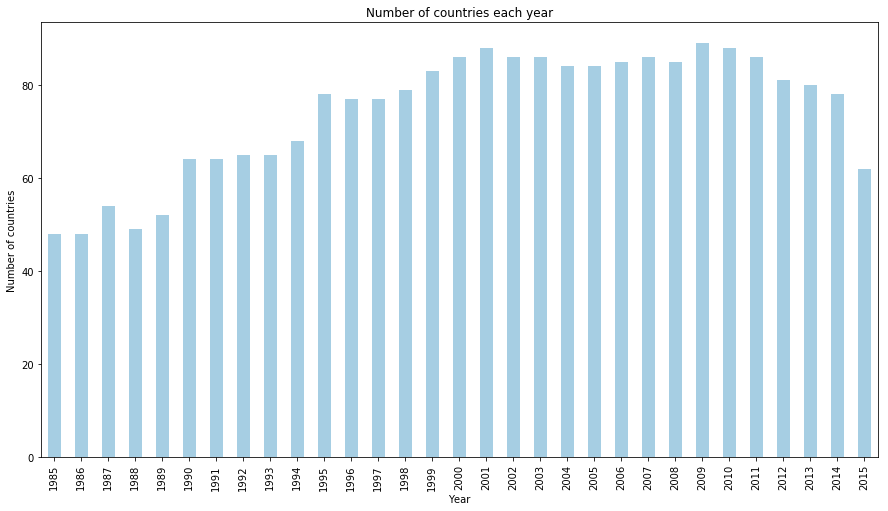

In [14]:
countries_per_year = []

years = df.year.unique()

for year in sorted(years):
    number = len(df[df['year']==year].country.unique().tolist())
    countries_per_year.append({'Year': year, 'courtry_num': number})

countries_per_year = pd.DataFrame(countries_per_year)

ax = countries_per_year.plot(figsize=(15,8),kind="bar", x="Year", y="courtry_num", title="Number of countries each year", legend = False, colormap='Paired')
ax.set_ylabel("Number of countries")

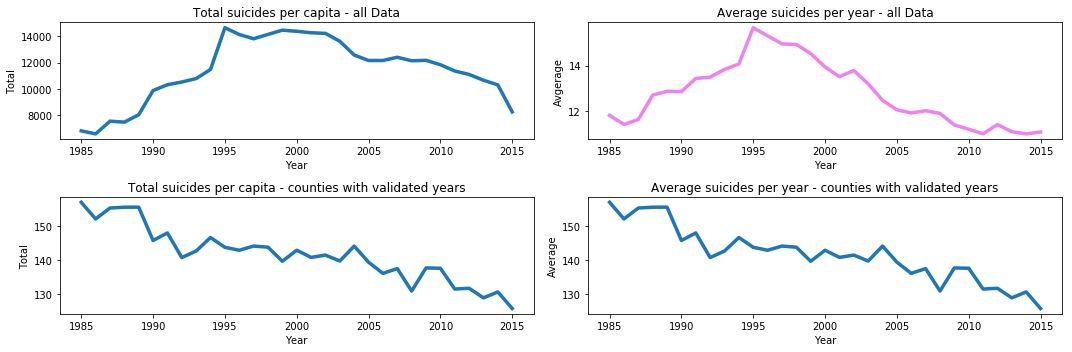

In [15]:
df_world = df.groupby(['year'])[['suicides/100k pop']].sum().reset_index()
df_world1 = df.groupby(['year'])[['suicides/100k pop']].mean().reset_index()
df_all_world = all_year_df.groupby(['year'])[['suicides/100k pop']].mean().reset_index()
df_all_world1 = all_year_df.groupby(['year'])[['suicides/100k pop']].mean().reset_index()


ax = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

df_world.plot(ax = ax, x='year',y='suicides/100k pop', figsize=(15,5), legend = False, title="Total suicides per capita - all Data", linewidth = 3.5)
ax.set_ylabel("Total")
ax.set_xlabel("Year")

df_world1.plot(ax = ax2, x='year',y='suicides/100k pop', figsize=(15,5), legend = False, title="Average suicides per year - all Data", linewidth = 3.5, color = 'violet')
ax2.set_ylabel("Avgerage")
ax2.set_xlabel("Year")


df_all_world.plot(ax = ax3, x='year',y='suicides/100k pop', figsize=(15,5), legend = False, title="Total suicides per capita - counties with validated years", linewidth = 3.5)
ax3.set_ylabel("Total")
ax3.set_xlabel("Year")

df_all_world1.plot(ax = ax4, x='year',y='suicides/100k pop', figsize=(15,5), legend = False, title="Average suicides per year - counties with validated years", linewidth = 3.5)
ax4.set_ylabel("Average")
ax4.set_xlabel("Year")

plt.tight_layout()


**Summaries of Original dataset**

The summaries of the original dataset can be seen here below, where we can see all of the underlying statistics for each column.

In [16]:
print('Summary about the original suicide data: \n', df.describe())

Summary about the original suicide data: 
                year    population  suicides/100k pop   suicides_no  \
count  27660.000000  2.766000e+04       27660.000000  27660.000000   
mean    2001.173102  1.850689e+06          12.812597    243.413485   
std        8.418754  3.920658e+06          18.972063    904.490185   
min     1985.000000  2.780000e+02           0.000000      0.000000   
25%     1994.000000  9.753525e+04           0.910000      3.000000   
50%     2002.000000  4.307250e+05           5.980000     25.000000   
75%     2008.000000  1.491041e+06          16.602500    132.000000   
max     2015.000000  4.380521e+07         224.970000  22338.000000   

       gdp_per_capita ($)  
count        27660.000000  
mean         16815.568330  
std          18861.585497  
min            251.000000  
25%           3436.000000  
50%           9283.000000  
75%          24796.000000  
max         126352.000000  


**Generations**

The number of observations for each generation is similar. 

Text(0,0.5,'Number observations for Generation')

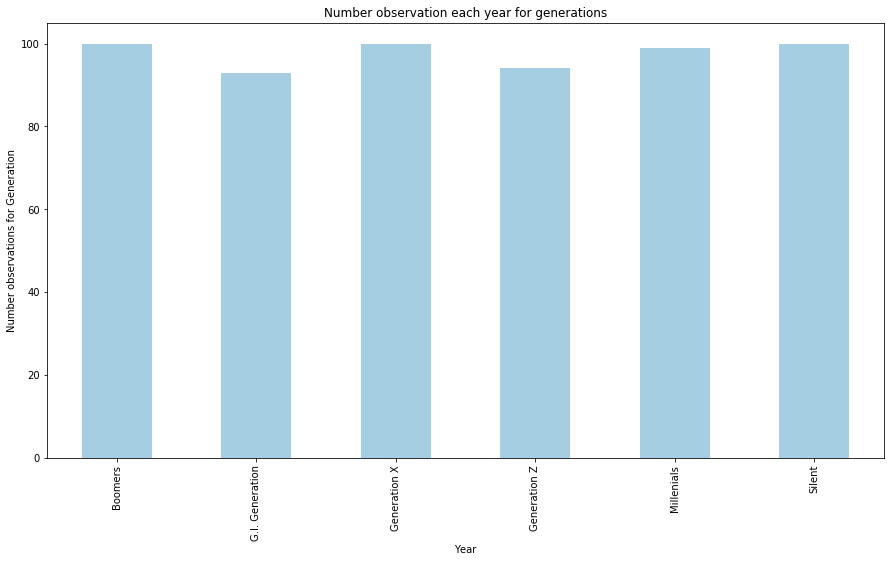

In [17]:
generation_per_year = []

generations = df.generation.unique()

for gen in sorted(generations):
    number = len(df[df['generation']==gen].country.unique().tolist())
    generation_per_year.append({'Year': gen, 'num': number})

generation_per_year = pd.DataFrame(generation_per_year)

ax = generation_per_year.plot(figsize=(15,8),kind="bar", x="Year", y="num", title="Number observation each year for generations", legend = False, colormap='Paired')
ax.set_ylabel("Number observations for Generation")

*Table 1: Generations*

Information about birth years, minimum age and maximum age for each generation

| Generation       |  Born in years  |  Current min age  | Current max age  |
|  -------------   |  -------------  |   -------------   |  -------------   |
| Generation Z     | 1995-2005       | 14                | 24               | 
| Millenials       | 1980-1995       | 24                | 39               |
| Generation X     | 1960-1980       | 39                | 60               |
| Boomers          |  1946-1964      | 60                | 73               |
| Silent           | 1925-1940       | 79                | 118              |
| G.I. Generation  | 1900-1925       | 118               | -                |

Below, we can see boxplots of distribution of suicides per 100,000 capita for each generation. Inspecting the boxplots one might assume that the Silent generation and the G.I. generation are more likely to commit suicide as the median values of suicides per 100,000 capita as well as the 75% percentile are of more magnitude than for other generations. However, when looking at *Table 1* it can be seen that the underlying reason for this is most likely due to the fact that other generations have not reached the age of 73 years. This implicates that either the G.I and Silent generations which were born during WWII and raised under the hard circumstances of the great depression might tend to commit suicides more frequently than other generations or that growing age has a massive impact on suicides. This will be further in the explanatory analysis. 

Text(0,0.5,'Number of people')

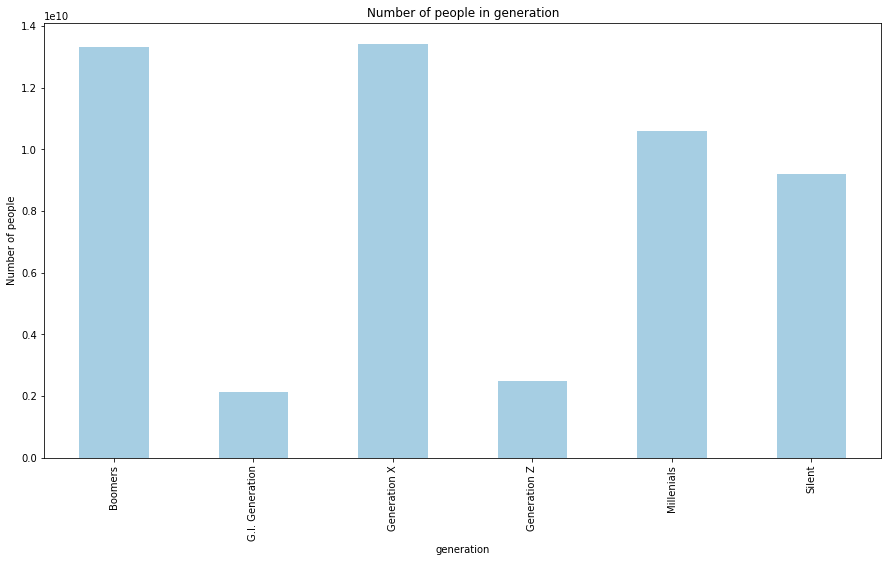

In [18]:
age_pop = df.groupby('generation').population.sum().reset_index()

ax = age_pop.plot(figsize=(15,8),kind="bar", x="generation", y="population", title="Number of people in generation", legend = False, colormap='Paired')
ax.set_ylabel("Number of people")

Text(0.5,0,'Generation')

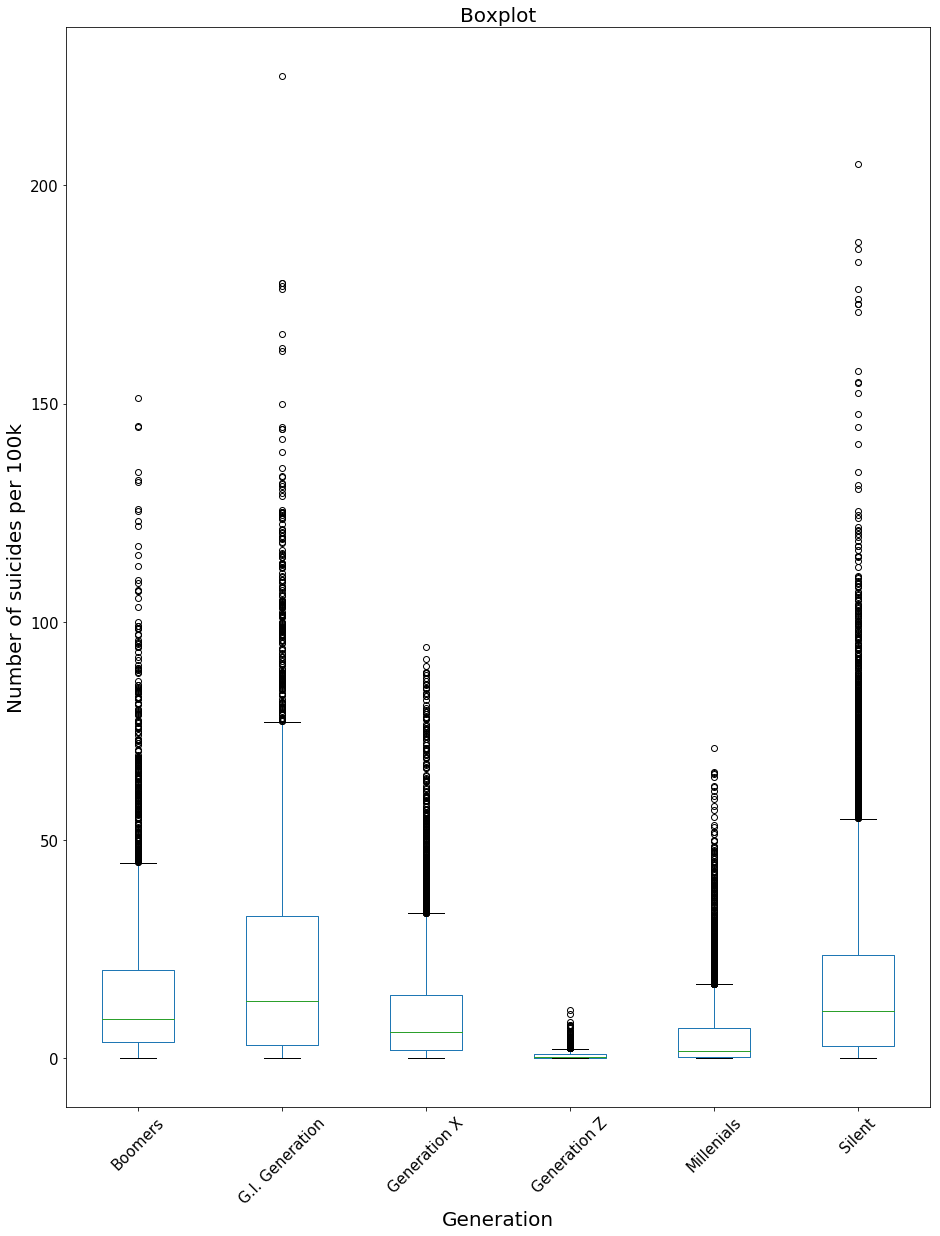

In [19]:
df.boxplot(by='generation', column = ['suicides/100k pop'], figsize=(15,20), rot=45, grid=False, fontsize=15)
plt.suptitle('')
plt.title('Boxplot', fontsize=20)
plt.ylabel('Number of suicides per 100k', fontsize=20, )
plt.xlabel('Generation', fontsize=20)

Below, we can see the number of suicides per 100,000 capita for each generation. It is a surprise that some generations have fewer years of data than others most likely due to the current age of the generation. There is also a considerable increase in suicides between some years which might be due to observations from more countries some years. Therefore we repeat the plotting for data having county measurements for each year. The consequences of missing data for years has not as drastical impact on the generation distribution as for the development of suicide even though the difference is noticeable. The plot of population development over the years proves that there is some difference due to the missing data since some grown generation seem to be gaining more members which does not make sense. 

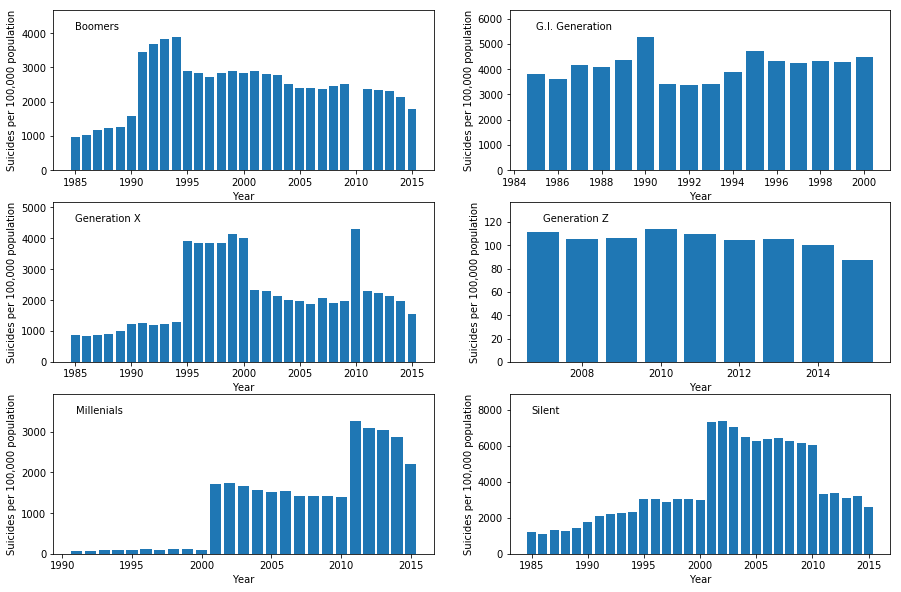

In [72]:
df_gen = df.groupby(['generation','year'])['suicides/100k pop'].sum().reset_index()
generations = df_gen.generation.unique().tolist()

fig = plt.figure(figsize=(15, 10))

num_bins = len(generations)

for i, gen in enumerate(generations):
    current = df_gen[df_gen['generation']==gen]
    sui = current['suicides/100k pop']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,gen)
    ax.set_xlabel('Year')
    ax.set_ylabel('Suicides per 100,000 population')



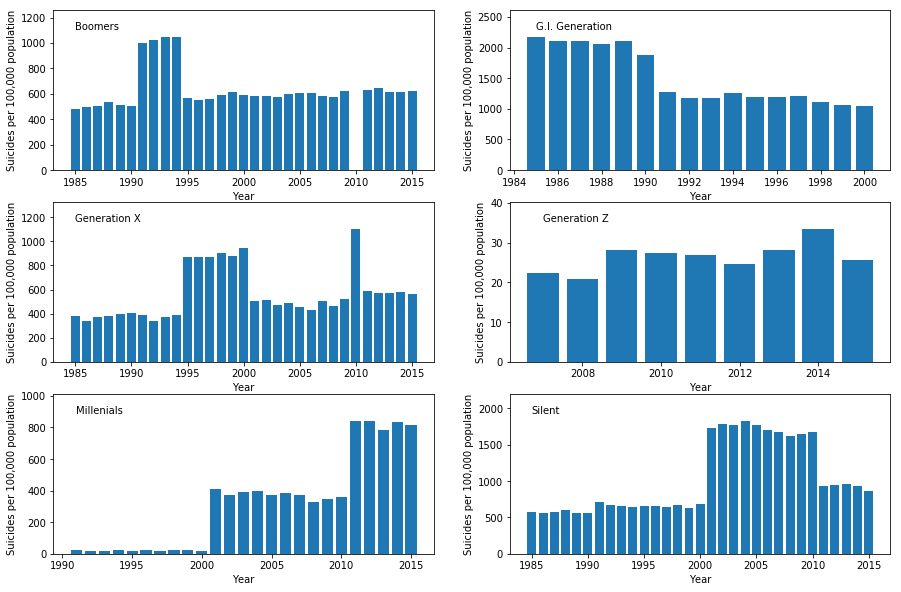

In [21]:
country_set = all_year_df.country.unique()

df_all_year = df[df['country'].isin(country_set)]
df_gen = df_all_year.groupby(['generation','year'])['suicides/100k pop'].sum().reset_index()
generations = df_gen.generation.unique().tolist()

fig = plt.figure(figsize=(15, 10))

df_gen.to_csv('continuos_generSui.csv', index=False)


num_bins = len(generations)

for i, gen in enumerate(generations):
    current = df_gen[df_gen['generation']==gen]
    sui = current['suicides/100k pop']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,gen)
    ax.set_xlabel('Year')
    ax.set_ylabel('Suicides per 100,000 population')


    generation  year  suicides/100k pop    population
111     Silent  1985             577.99  4.365033e+06
112     Silent  1986             558.43  4.464769e+06
113     Silent  1987             577.01  4.547588e+06
114     Silent  1988             600.58  4.640990e+06
115     Silent  1989             560.92  4.741107e+06
116     Silent  1990             558.69  4.823993e+06
117     Silent  1991             707.97  2.933348e+06
118     Silent  1992             675.34  2.974516e+06
119     Silent  1993             656.55  3.025923e+06
120     Silent  1994             646.29  3.075216e+06
121     Silent  1995             660.81  3.120921e+06
122     Silent  1996             652.60  3.171642e+06
123     Silent  1997             645.11  3.217906e+06
124     Silent  1998             676.36  3.274539e+06
125     Silent  1999             635.44  3.328819e+06
126     Silent  2000             688.95  3.389367e+06
127     Silent  2001            1738.25  2.279094e+06
128     Silent  2002        

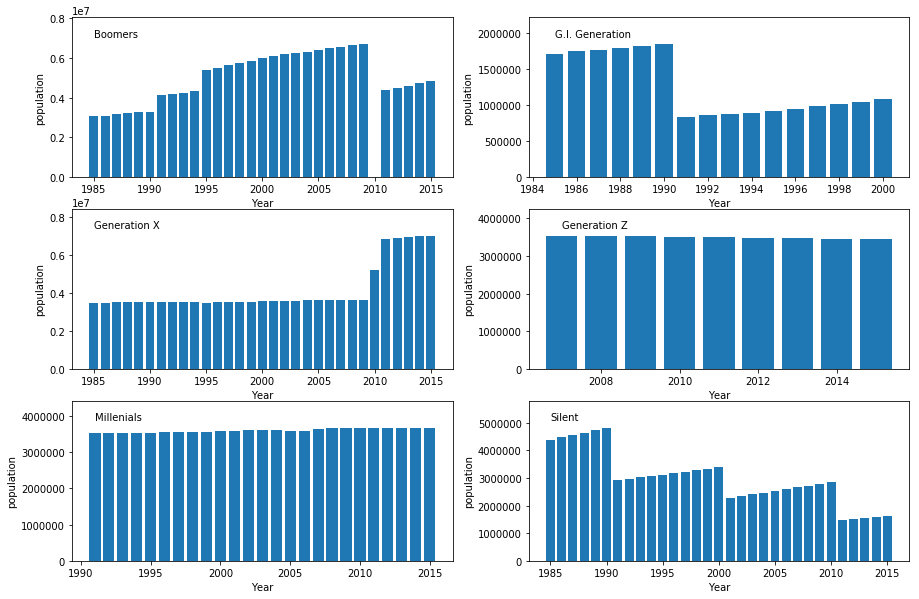

In [71]:
df_gen = df_all_year.groupby(['generation','year']).agg({'suicides/100k pop': np.sum, 'population': np.mean}).reset_index()
generations = df_gen.generation.unique().tolist()

print(df_gen[df_gen['generation']=='Silent'])
fig = plt.figure(figsize=(15, 10))

df_gen.to_csv('continuos_generSui.csv', index=False)

for i, gen in enumerate(generations):
    current = df_gen[df_gen['generation']==gen]
    sui = current['population']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,gen)
    ax.set_xlabel('Year')
    ax.set_ylabel('population')

    

Let's get more insight into how the suicide rates between generations develope over the years. There are similar trends for the different dataset. However, there are differences between the average development and total development of suicide rates over the years suggesting different trends of generations within countries or a different number of observations between generations which makes sense since we see that G.I. generation carries data until around 2000  when the generation seems to vanish. There are different life expectancies for different countries causing missing measurements for the lower life expectancy counties. 

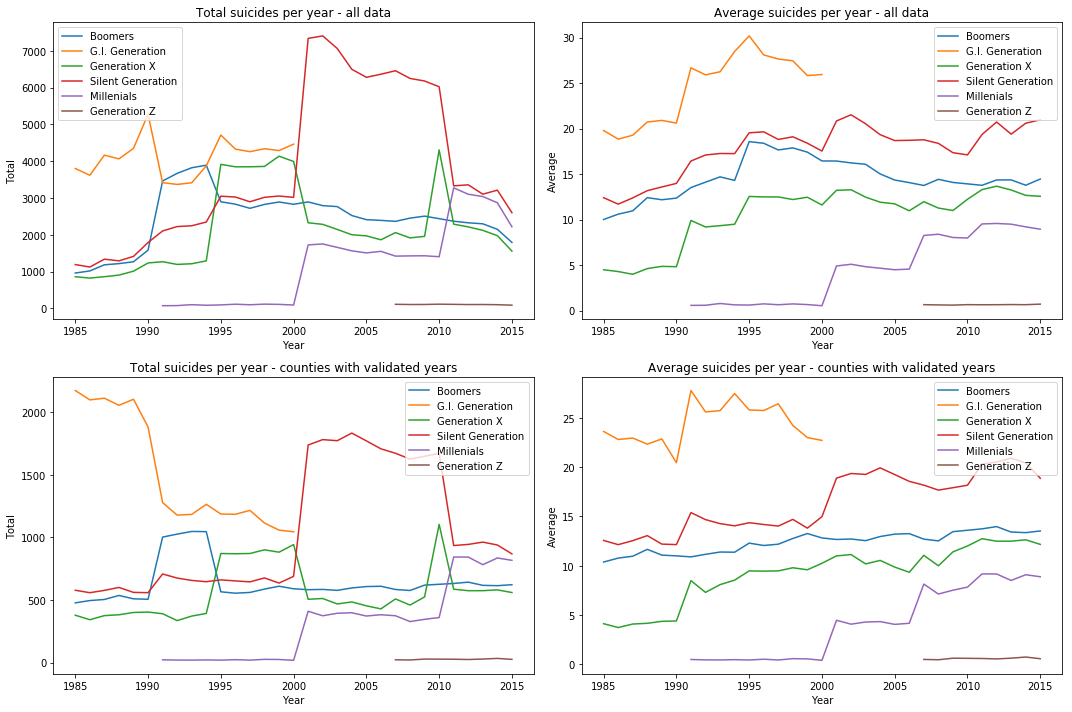

In [23]:
ax = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


# Original Data
df_gen_over_years = df.groupby(['year','generation'])['suicides/100k pop'].sum().reset_index()
df_gen_over_years1 = df.groupby(['year','generation'])['suicides/100k pop'].mean().reset_index()

df_gen_over_years_boomer = df_gen_over_years[df_gen_over_years['generation'] == 'Boomers']
df_gen_over_years_gi = df_gen_over_years[df_gen_over_years['generation'] == 'G.I. Generation']
df_gen_over_years_x = df_gen_over_years[df_gen_over_years['generation'] == 'Generation X']
df_gen_over_years_silent = df_gen_over_years[df_gen_over_years['generation'] == 'Silent']
df_gen_over_years_mil = df_gen_over_years[df_gen_over_years['generation'] == 'Millenials']
df_gen_over_years_z = df_gen_over_years[df_gen_over_years['generation'] == 'Generation Z']

ax = df_gen_over_years_boomer.plot(ax = ax, x='year',y='suicides/100k pop', figsize=(15,10))
df_gen_over_years_gi.plot(ax=ax, x='year',y='suicides/100k pop')
df_gen_over_years_x.plot(ax=ax, x='year',y='suicides/100k pop')
df_gen_over_years_silent.plot(ax=ax, x='year',y='suicides/100k pop')
df_gen_over_years_mil.plot(ax=ax, x='year',y='suicides/100k pop')
df_gen_over_years_z.plot(ax=ax, x='year',y='suicides/100k pop')

ax.set_title("Total suicides per year - all data")
ax.set_ylabel("Total")
ax.set_xlabel("Year")
ax.legend(["Boomers","G.I. Generation", "Generation X","Silent Generation", "Millenials","Generation Z"]);

#average
df_gen_over_years_boomer = df_gen_over_years1[df_gen_over_years['generation'] == 'Boomers']
df_gen_over_years_gi = df_gen_over_years1[df_gen_over_years['generation'] == 'G.I. Generation']
df_gen_over_years_x = df_gen_over_years1[df_gen_over_years['generation'] == 'Generation X']
df_gen_over_years_silent = df_gen_over_years1[df_gen_over_years['generation'] == 'Silent']
df_gen_over_years_mil = df_gen_over_years1[df_gen_over_years['generation'] == 'Millenials']
df_gen_over_years_z = df_gen_over_years1[df_gen_over_years['generation'] == 'Generation Z']

ax2 = df_gen_over_years_boomer.plot(ax=ax2,x='year',y='suicides/100k pop', figsize=(15,10))
df_gen_over_years_gi.plot(ax=ax2, x='year',y='suicides/100k pop')
df_gen_over_years_x.plot(ax=ax2, x='year',y='suicides/100k pop')
df_gen_over_years_silent.plot(ax=ax2, x='year',y='suicides/100k pop')
df_gen_over_years_mil.plot(ax=ax2, x='year',y='suicides/100k pop')
df_gen_over_years_z.plot(ax=ax2, x='year',y='suicides/100k pop')

ax2.set_title("Average suicides per year - all data")
ax2.set_ylabel("Average")
ax2.set_xlabel("Year")
ax2.legend(["Boomers","G.I. Generation", "Generation X","Silent Generation", "Millenials","Generation Z"]);


# Validated Set
df_gen_over_years = df_all_year.groupby(['year','generation'])['suicides/100k pop'].sum().reset_index()
df_gen_over_years1 = df_all_year.groupby(['year','generation'])['suicides/100k pop'].mean().reset_index()

df_gen_over_years_boomer = df_gen_over_years[df_gen_over_years['generation'] == 'Boomers']
df_gen_over_years_gi = df_gen_over_years[df_gen_over_years['generation'] == 'G.I. Generation']
df_gen_over_years_x = df_gen_over_years[df_gen_over_years['generation'] == 'Generation X']
df_gen_over_years_silent = df_gen_over_years[df_gen_over_years['generation'] == 'Silent']
df_gen_over_years_mil = df_gen_over_years[df_gen_over_years['generation'] == 'Millenials']
df_gen_over_years_z = df_gen_over_years[df_gen_over_years['generation'] == 'Generation Z']

ax3 = df_gen_over_years_boomer.plot(ax=ax3,x='year',y='suicides/100k pop', figsize=(15,10))
df_gen_over_years_gi.plot(ax=ax3, x='year',y='suicides/100k pop')
df_gen_over_years_x.plot(ax=ax3, x='year',y='suicides/100k pop')
df_gen_over_years_silent.plot(ax=ax3, x='year',y='suicides/100k pop')
df_gen_over_years_mil.plot(ax=ax3, x='year',y='suicides/100k pop')
df_gen_over_years_z.plot(ax=ax3, x='year',y='suicides/100k pop')

ax3.set_title("Total suicides per year - counties with validated years")
ax3.set_ylabel("Total")
ax3.set_xlabel("Year")
ax3.legend(["Boomers","G.I. Generation", "Generation X","Silent Generation", "Millenials","Generation Z"]);

# Average
df_gen_over_years_boomer = df_gen_over_years1[df_gen_over_years['generation'] == 'Boomers']
df_gen_over_years_gi = df_gen_over_years1[df_gen_over_years['generation'] == 'G.I. Generation']
df_gen_over_years_x = df_gen_over_years1[df_gen_over_years['generation'] == 'Generation X']
df_gen_over_years_silent = df_gen_over_years1[df_gen_over_years['generation'] == 'Silent']
df_gen_over_years_mil = df_gen_over_years1[df_gen_over_years['generation'] == 'Millenials']
df_gen_over_years_z = df_gen_over_years1[df_gen_over_years['generation'] == 'Generation Z']

ax4 = df_gen_over_years_boomer.plot(ax=ax4, x='year',y='suicides/100k pop', figsize=(15,10))
df_gen_over_years_gi.plot(ax=ax4, x='year',y='suicides/100k pop')
df_gen_over_years_x.plot(ax=ax4, x='year',y='suicides/100k pop')
df_gen_over_years_silent.plot(ax=ax4, x='year',y='suicides/100k pop')
df_gen_over_years_mil.plot(ax=ax4, x='year',y='suicides/100k pop')
df_gen_over_years_z.plot(ax=ax4, x='year',y='suicides/100k pop')

ax4.set_title("Average suicides per year - counties with validated years")
ax4.set_ylabel("Average")
ax4.set_xlabel("Year")
ax4.legend(["Boomers","G.I. Generation", "Generation X","Silent Generation", "Millenials","Generation Z"]);

plt.tight_layout()



**Genders**

The following boxplot shows the distribution of number of suicides per 100,000 capita for the genders. We can see that the median value for women is lower than for men even thought there are more women in the world. The is also more variance in the male data. 

Text(0,0.5,'Number of people')

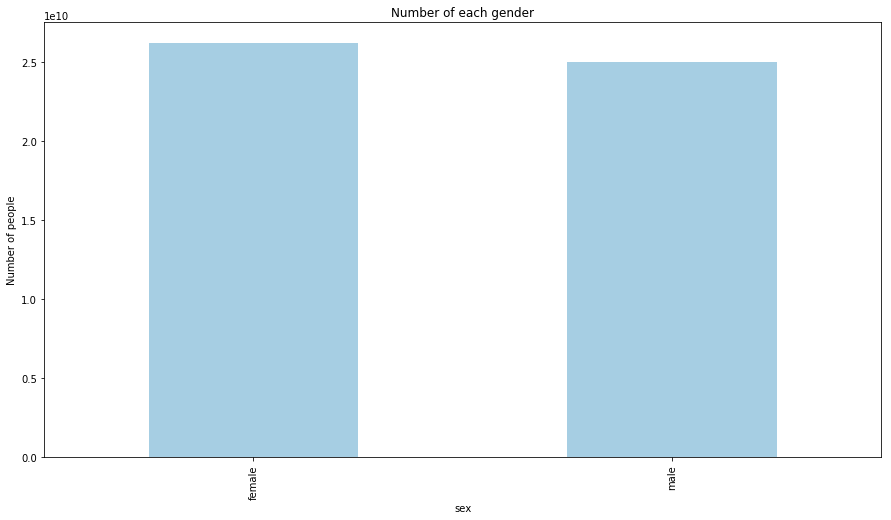

In [24]:
age_pop = df.groupby('sex').population.sum().reset_index()

ax = age_pop.plot(figsize=(15,8),kind="bar", x="sex", y="population", title="Number of each gender", legend = False, colormap='Paired')
ax.set_ylabel("Number of people")

Text(0.5,0,'Gender')

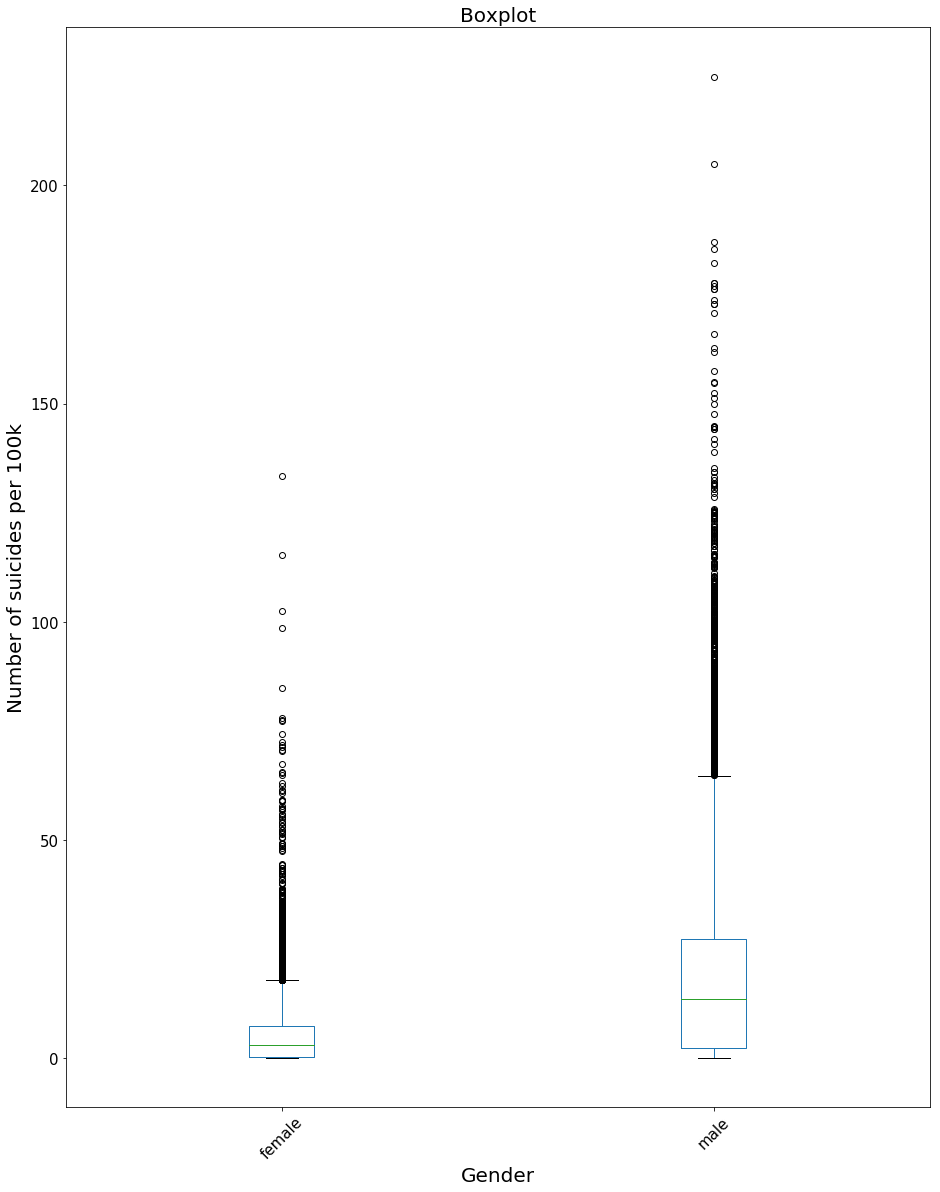

In [25]:
df.boxplot(by='sex', column = ['suicides/100k pop'], figsize=(15,20), rot=45, grid=False, fontsize=15)
plt.suptitle('')
plt.title('Boxplot', fontsize=20)
plt.ylabel('Number of suicides per 100k', fontsize=20, )
plt.xlabel('Gender', fontsize=20)

Histograms of suicides per 100,000 capita for the genders can be seen below. The distribution and trend in suicides seems similar for  the two genders but the males are on larger scale. The female suicides appears to be fractional to the male suicides with a factor of $\dfrac{1}{3}$. That is to say for there are more than **three men for each woman** that commit suicide. Again the plots will be repeated for dataset including countries with all years available to enable comparisons between years. As can be seen the changes between suicide rates per 100,000 population between years are quite different.

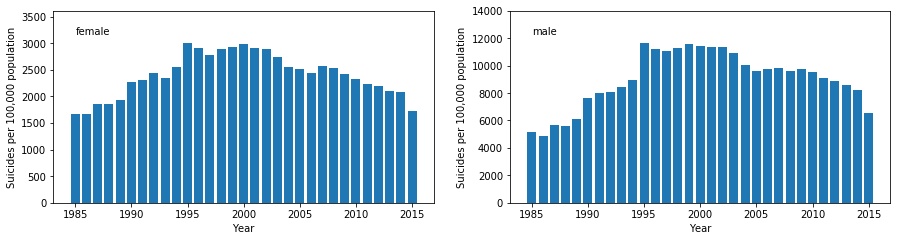

In [26]:
df_sex = df.groupby(['sex','year'])['suicides/100k pop'].sum().reset_index()
gender = df_sex.sex.unique().tolist()

fig = plt.figure(figsize=(15, 12))

num_bins = len(generations)

for i, sex in enumerate(gender):
    current = df_sex[df_sex['sex']==sex]
    sui = current['suicides/100k pop']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,sex)
    ax.set_xlabel('Year')
    ax.set_ylabel('Suicides per 100,000 population')


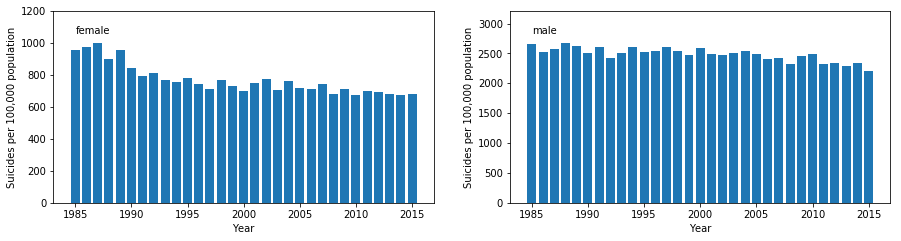

In [27]:
df_sex = df_all_year.groupby(['sex','year'])['suicides/100k pop'].sum().reset_index()
gender = df_sex.sex.unique().tolist()

fig = plt.figure(figsize=(15, 12))


num_bins = len(generations)

for i, sex in enumerate(gender):
    current = df_sex[df_sex['sex']==sex]
    sui = current['suicides/100k pop']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,sex)
    ax.set_xlabel('Year')
    ax.set_ylabel('Suicides per 100,000 population')


Let's plot the suicide rates for both genders in the same figure, so it is easier to interpret the magnitude difference in the distribution over the years for the genders by using the validated data. 

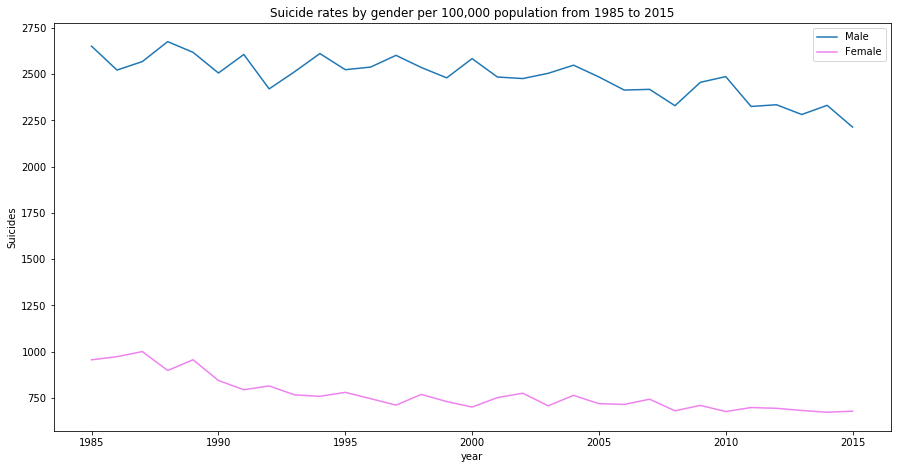

In [28]:
df_male = df_sex[df_sex['sex']=='male']
df_female = df_sex[df_sex['sex']=='female']

ax = df_male.plot(x="year",y="suicides/100k pop", title="Suicide rates by gender per 100,000 population from 1985 to 2015", figsize=(15,7.5))
df_female.plot(ax = ax, x="year",y="suicides/100k pop",c='violet')
ax.set_ylabel("Suicides")
ax.legend(["Male", "Female"]);

**Age-groups**

It is interesting to see that there are few people in the age group of 75+ compared to the other age groups.  However, the boxplot suggests that this is the age group which has the most tendency to commit suicide. The figures below indicate that suicide rates increase with age that is to say **suicide rates and age seems to have positive corrilation**.

Text(0,0.5,'Number of people')

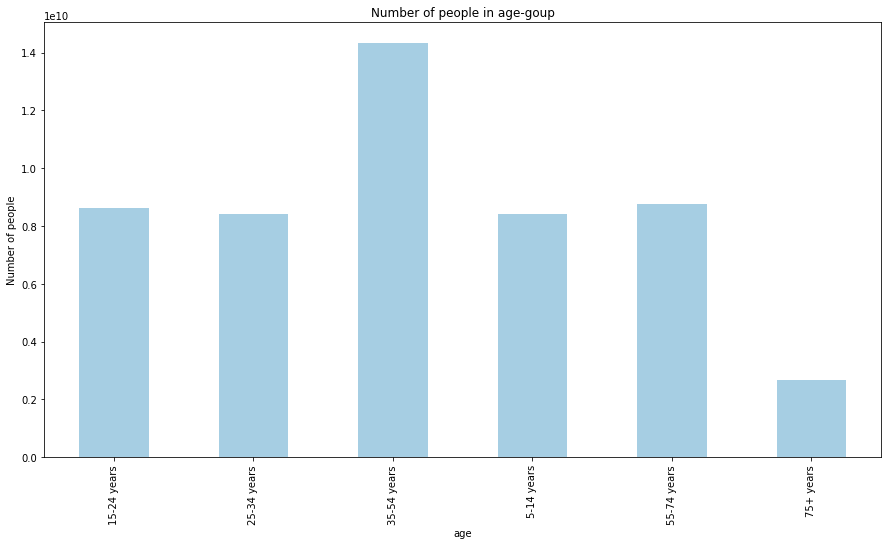

In [29]:
age_pop = df.groupby('age').population.sum().reset_index()

ax = age_pop.plot(figsize=(15,8),kind="bar", x="age", y="population", title="Number of people in age-goup", legend = False, colormap='Paired')
ax.set_ylabel("Number of people")

Text(0.5,0,'Age groups')

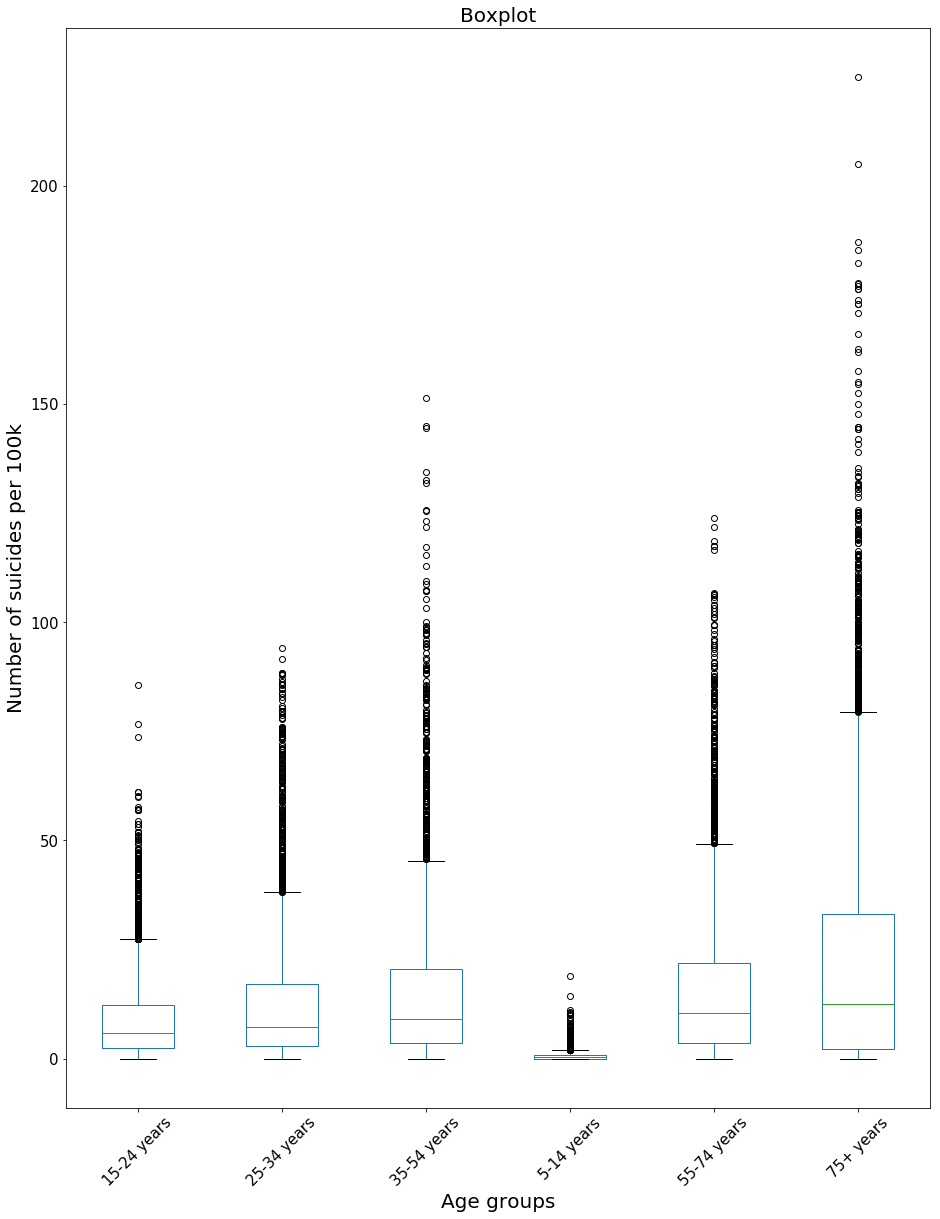

In [30]:
df.boxplot(by='age', column = ['suicides/100k pop'], figsize=(15,20), rot=45, grid=False, fontsize=15)
plt.suptitle('')
plt.title('Boxplot', fontsize=20)
plt.ylabel('Number of suicides per 100k', fontsize=20, )
plt.xlabel('Age groups', fontsize=20)

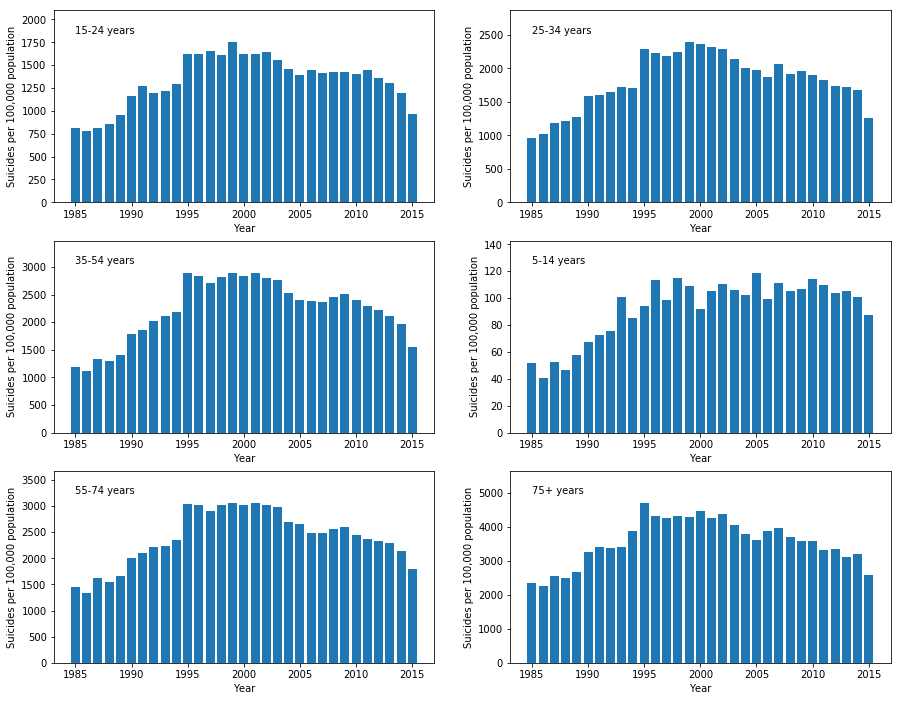

In [31]:
df_age = df.groupby(['age','year'])['suicides/100k pop'].sum().reset_index()
age = df_age.age.unique().tolist()

fig = plt.figure(figsize=(15, 12))

num_bins = len(age)

for i, ages in enumerate(age):
    current = df_age[df_age['age']==ages]
    sui = current['suicides/100k pop']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,ages)
    ax.set_xlabel('Year')
    ax.set_ylabel('Suicides per 100,000 population')
    ax.set_ylabel('Suicides per 100,000 population')

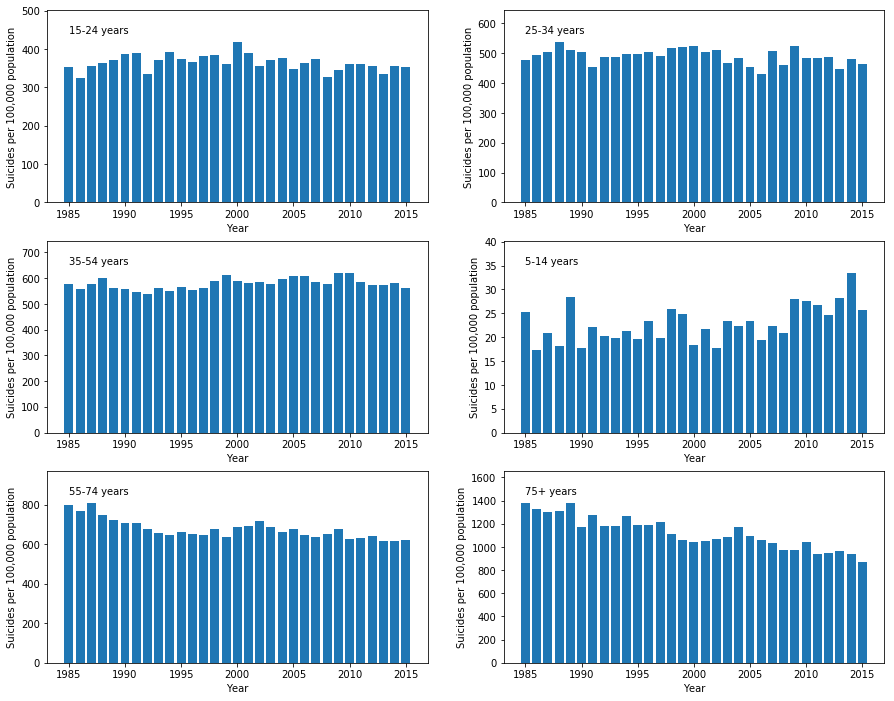

In [32]:
df_age = df_all_year.groupby(['age','year'])['suicides/100k pop'].sum().reset_index()
age = df_age.age.unique().tolist()

fig = plt.figure(figsize=(15, 12))

df_age.to_csv('continuos_ageSui.csv', index=False)

num_bins = len(age)

for i, ages in enumerate(age):
    current = df_age[df_age['age']==ages]
    sui = current['suicides/100k pop']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,ages)
    ax.set_xlabel('Year')
    ax.set_ylabel('Suicides per 100,000 population')

It is interesting to see that the 75+ suicides rates seem to be decreasing while the number of 75+ people in the world are increasing at a rapid rate. This needs to be addressed further.

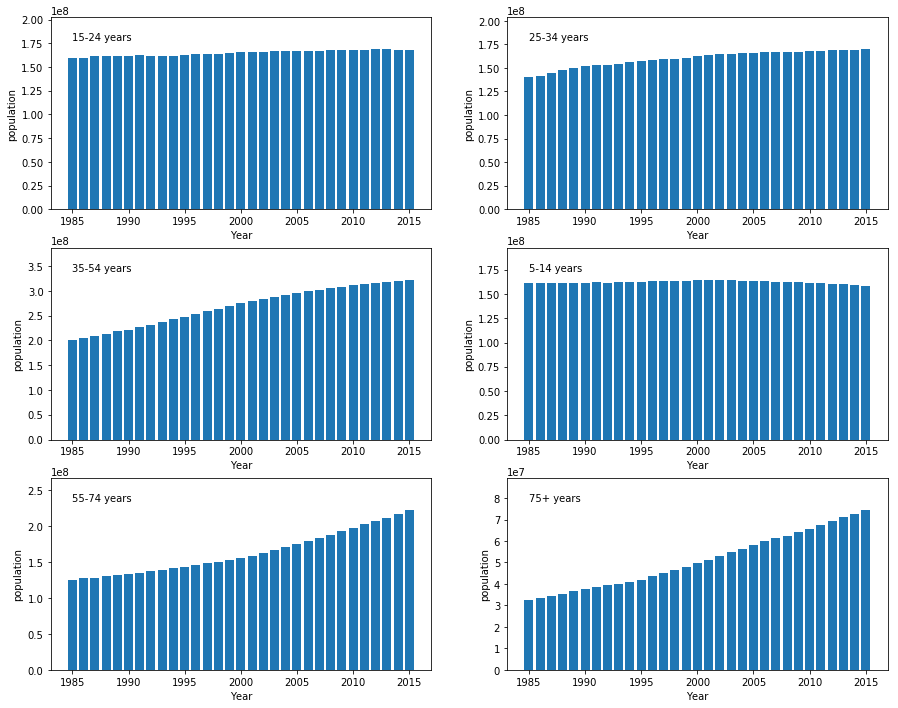

In [85]:
df_age_pop = df_all_year.groupby(['age','year']).agg({'suicides/100k pop': np.sum, 'population': np.sum}).reset_index()
age = df_age_pop.age.unique().tolist()

fig = plt.figure(figsize=(15, 12))

df_age_pop.to_csv('continuos_agePOP.csv', index=False)

num_bins = len(age)

for i, ages in enumerate(age):
    current = df_age_pop[df_age_pop['age']==ages]
    sui = current['population']
    dates = current['year']
    ax = fig.add_subplot(num_bins//2,2,(i+1))
    ax.set_ylim([0,max(sui)*1.2])
    ax.bar(dates,sui, align='center')
    ax.text(min(dates), max(sui)*1.055,ages)
    ax.set_xlabel('Year')
    ax.set_ylabel('population')

**Countries**

In order to compare the counties for the whole dataset we must average the suicide rates over the number of observation. This might lead to somewhat biased results due to the fact that some essential measurement might exist for only a small proportion of the dataset. 

It makes sense that Russia, the US and Japan have the most suicides because they have some of the largest population in the world. If **China** were represented in this database it is likely to take the lead in this barplot. 

The next step is to use a more informative chart is the plot where the suicides rates have been corrected for per 100,000 population.

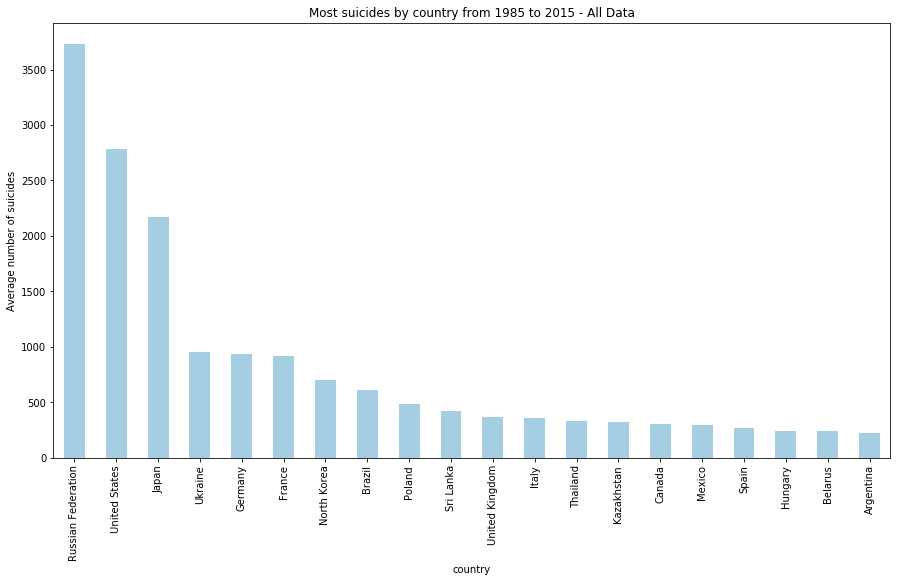

In [74]:
df_top_10 = df.groupby(['country']).suicides_no.mean().reset_index().sort_values(by='suicides_no', ascending=False).head(20)
ax = df_top_10.plot(figsize=(15,8),kind="bar", x="country", y="suicides_no", title="Most suicides by country from 1985 to 2015 - All Data", legend = False, colormap='Paired')
ax.set_ylabel("Average number of suicides")

df_countries_total = df.groupby(['country']).suicides_no.sum().reset_index().sort_values(by='suicides_no', ascending=False)
df_countries_total.to_csv("df_countries_total.csv",sep=",",index=False)

It is a surprise to see that Lithuania has the most suicides on average per capita.

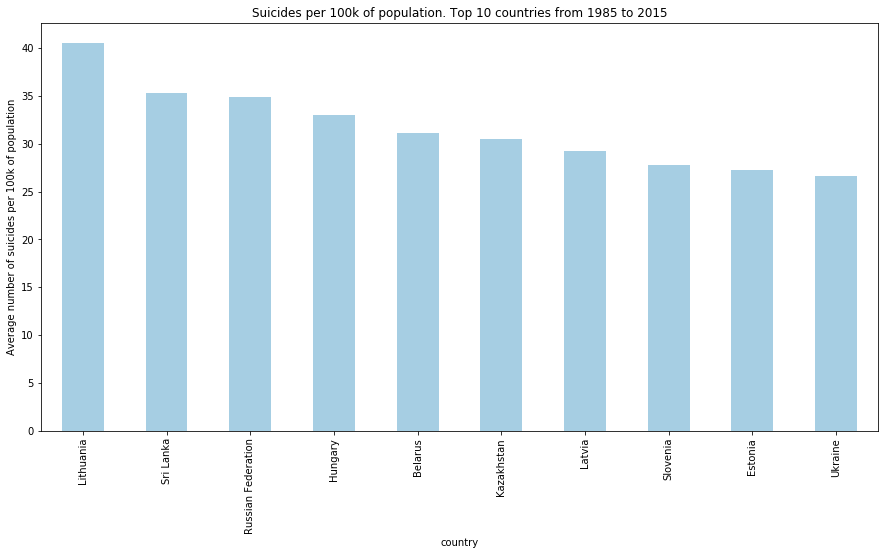

In [75]:
df_top_10_100k = df.groupby(['country'])['suicides/100k pop'].mean().reset_index().sort_values(by='suicides/100k pop',ascending=False).head(10)
ax = df_top_10_100k.plot(kind="bar",x="country",y="suicides/100k pop",figsize=(15,7.5), legend=False, colormap='Paired',title="Suicides per 100k of population. Top 10 countries from 1985 to 2015")
ax.set_ylabel("Average number of suicides per 100k of population")

df_countries_rel = df.groupby(['country'])['suicides/100k pop'].mean().reset_index().sort_values(by='suicides/100k pop',ascending=False)
#df_countries_rel.to_csv("df_countries_rel.csv",sep=",",index=False)

**Continents**

Beforehand it is believed that there are unequal numbers of countries representing each continent. The bar plot supports the idea where it can be seen that Africa is under-represented in the dataset and there are distinct numbers of countries for each continent. One needs to be careful when comparing the continent by correcting for the number of countries at hand as well as the size of each population.  

Text(0,0.5,'Number of countries')

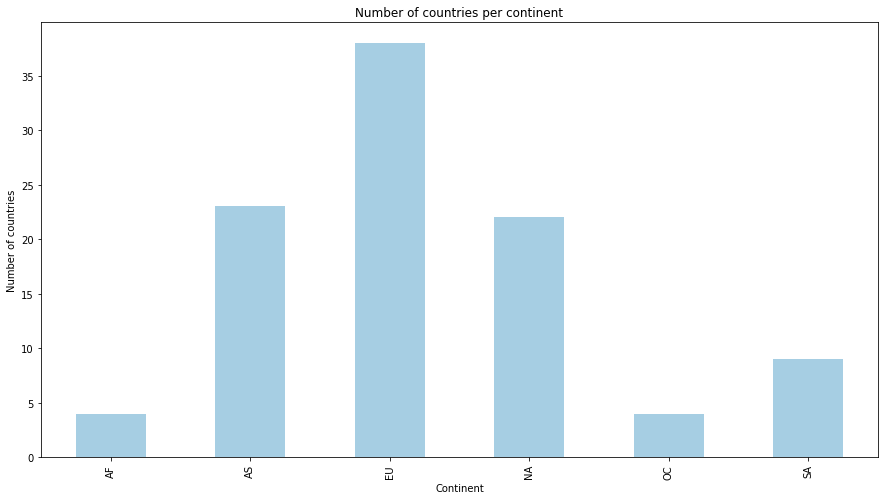

In [76]:
countries_per_continent = []
years = df.Continent.unique()

for year in sorted(years):
    number = len(df[df['Continent']==year].country.unique().tolist())
    countries_per_continent.append({'Continent': year, 'courtry_num': number})

countries_per_continent = pd.DataFrame(countries_per_continent)

ax = countries_per_continent.plot(figsize=(15,8),kind="bar", x="Continent", y="courtry_num", title="Number of countries per continent", legend = False, colormap='Paired')
ax.set_ylabel("Number of countries")

The upper plot shows sum of average suicides per capita over the countries in the corresponding continent.  Europe dominates this chart plausibly because most Europian countries exist in the dataset. Other continents are lacking measurements for the majority of their countries. 

In order to get a less biased comparison of continents, we correct these number according to the available countries in the corresponding continent. This has a huge impact as can be seen below. Now Oceania seems to be the continent with most suicides per capita. 

Text(0,0.5,'Average suicides per capita')

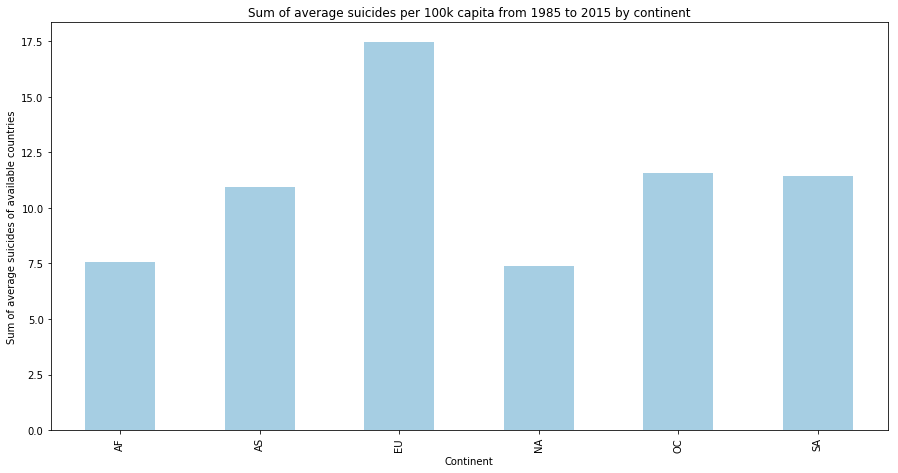

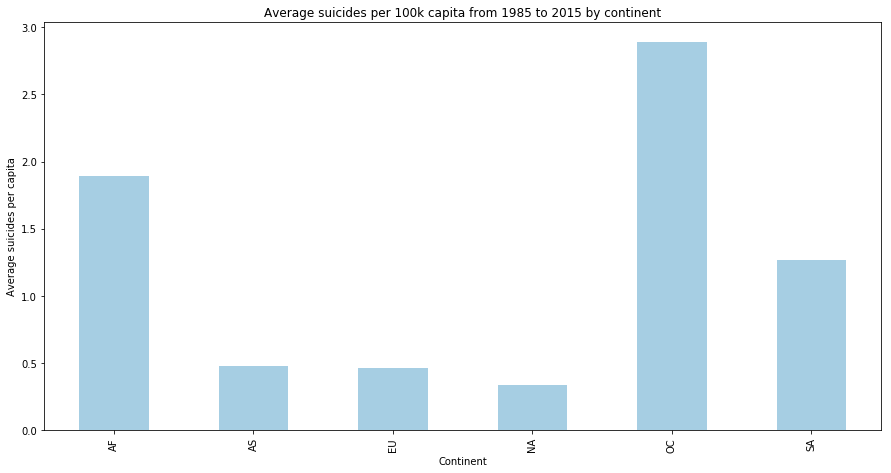

In [77]:
df_continent_rel = df.groupby(['Continent'])['suicides/100k pop'].mean().reset_index()
ax1 = df_continent_rel.plot(kind="bar", x="Continent",y="suicides/100k pop",colormap="Paired", title="Sum of average suicides per 100k capita from 1985 to 2015 by continent", figsize=(15,7.5),legend=False)
ax1.set_ylabel("Sum of average suicides of available countries")

continent = df_continent_rel.merge(countries_per_continent ,on = ['Continent'])
continent['corrected'] = continent['suicides/100k pop']/continent['courtry_num']

ax1 = continent.plot(kind="bar", x="Continent",y="corrected",colormap="Paired", title="Average suicides per 100k capita from 1985 to 2015 by continent", figsize=(15,7.5),legend=False)
ax1.set_ylabel("Average suicides per capita")


**Exploring other numerical features**

Below analysis on the numerical features will be performed by using the dataset covering counties having measurements for all years. This is done get as unbiased estimation on correlations and co-correlation of the features as possible concerning suicide rates.

In [38]:
data = all_Sui[all_Sui.country.isin(common)]
data = data.dropna()
numerical = data.groupby('year', as_index = False).mean()

In [39]:
numerical.head()

,year,population,suicides/100k pop,suicides_no,gdp_per_capita ($),PPP$,intusers%,flabor%
0,1995,2.616005e+06,11.893333,228.644737,20394.947368,1149.357895,29.110857,39.068421
1,1996,2.654195e+06,11.595044,232.912281,20630.052632,1208.142105,32.842376,39.589474
2,1997,2.800385e+06,11.836404,249.491228,19152.736842,1223.326316,36.080027,39.073684
3,1998,2.829120e+06,11.454254,289.083333,19129.736842,1302.400000,35.089257,38.826316
4,1999,2.858455e+06,11.328158,284.412281,19491.000000,1388.647368,28.535523,39.326316


A heatmap over the mean values of all years for the different features can be seen here below. According to the heatmap, GPD per capita and PPP per capita seem to have a strong negative correlation with suicide rates per capita. The relationship between GPD and PPP is strongly positive as is to be expected.  Percentage of internet user in a country seems to have a strong positive correlation with suicide rates per capita. Other features have no significant relationship. Therefore the emphasises will be put on GPD, PPP and percentage of internet users.

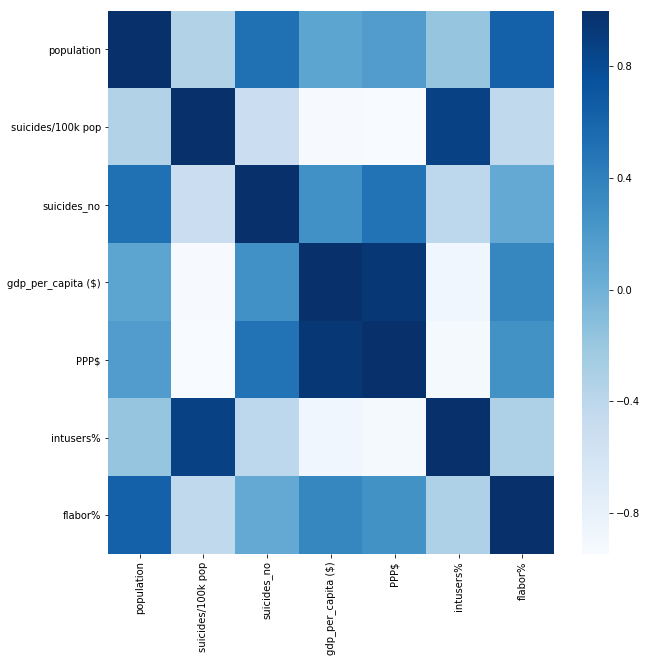

In [40]:
corr = numerical.iloc[:, 1:].corr()

#TOO MANY COLUMNS JUST SEE CORRELATION HEATMAP
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, ax=ax, cmap="Blues")

**GDP**

Let's look at how GDP per capita affects suicide rates per capita.

It seems to be the case that as GDP per capita rises, suicide rates go down.

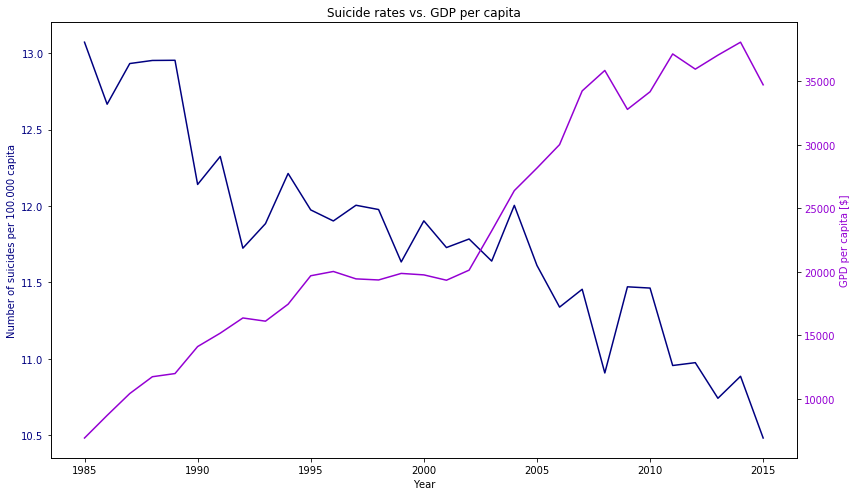

In [41]:
sui_data = df_all_year.groupby('year')['suicides/100k pop'].mean().reset_index()
gdp_data = df_all_year.groupby('year')['gdp_per_capita ($)'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12,7))

ax1.set_title("Suicide rates vs. GDP per capita")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides per 100.000 capita', color='Navy')
ax1.plot(sui_data.year, sui_data['suicides/100k pop'], color='Navy')
ax1.tick_params(axis='y', labelcolor='Navy')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('GPD per capita [$]', color='DarkViolet')  # we already handled the x-label with ax1
ax2.plot(gdp_data.year, gdp_data['gdp_per_capita ($)'], color='DarkViolet')
ax2.tick_params(axis='y', labelcolor='DarkViolet')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

**PPP**

The PPP per capita rises as suicide rates go down as is to be expected.

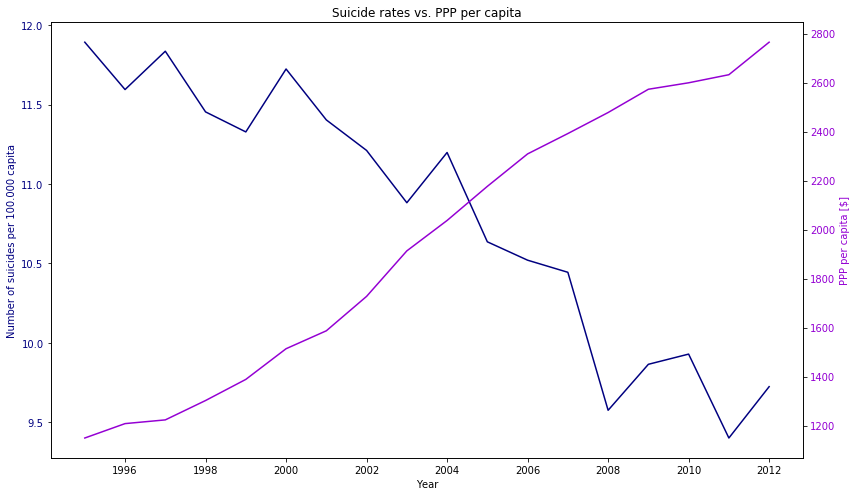

In [42]:
from matplotlib.ticker import MaxNLocator

sui_data = numerical.groupby('year')['suicides/100k pop'].mean().reset_index()
ppp_data = numerical.groupby('year')['PPP$'].mean().reset_index()


fig, ax1 = plt.subplots(figsize=(12,7))

ax1.set_title("Suicide rates vs. PPP per capita")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides per 100.000 capita', color='Navy')
ax1.plot(sui_data.year, sui_data['suicides/100k pop'], color='Navy')
ax1.tick_params(axis='y', labelcolor='Navy')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2 = ax1.twinx()

ax2.set_ylabel('PPP per capita [$]', color='DarkViolet') 
ax2.plot(ppp_data.year, ppp_data['PPP$'], color='DarkViolet')
ax2.tick_params(axis='y', labelcolor='DarkViolet')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()

**Internet users**

The trends for the percentage of internet users and suicide rates per capita are somewhat similar.

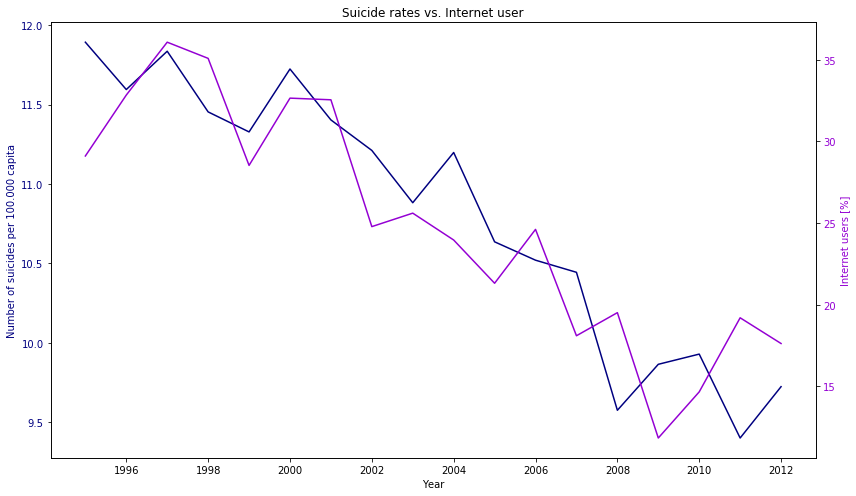

In [43]:
i_data = numerical.groupby('year')['intusers%'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12,7))

ax1.set_title("Suicide rates vs. Internet user")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides per 100.000 capita', color='Navy')
ax1.plot(sui_data.year, sui_data['suicides/100k pop'], color='Navy')
ax1.tick_params(axis='y', labelcolor='Navy')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2 = ax1.twinx()

ax2.set_ylabel('Internet users [%]', color='DarkViolet') 
ax2.plot(i_data.year, i_data['intusers%'], color='DarkViolet')
ax2.tick_params(axis='y', labelcolor='DarkViolet')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()

# 3. Data Analysis

## Describe your data analysis and explain what you've learned about the dataset.


Less than 25% of the 101 countries in the dataset have data for all of these 30 years which limits comparations between all countries over all the years to only 23 countries.  Fortunately, averaging suicides per capita for countries having measurement each year does not seem to be too far off. For this reason, two datasets were compared and explored. 

It is a relief to see that there is a decreasing trend in suicide rates per capita when looking at countries having all data available. 

As is to be expected generation have different suicide rates, and they seem to correlate with the age of generations. A likely cause of the correlation is the age that each generation has reached.  The generations that have reached 60 years have higher suicide rates per capita which suggest that suicides have a positive correlation with age as well.  Whether the positive correlation between the age generation and suicide rates per capita it is due to their childhood circumstances or not is hard to say without more informative visualizations.  There are peaks in suicide in 2001 both for the Millenians and the Silent generations, but at the same time, they account to more of the population. 

The genders seem to follow similar trends in suicides rates, but for each woman that commits suicide, there are three men.

The analysis suggests that the PPP and GPD have strong negative correlation on suicide rates whereas the percentage of internet uses has a strong positive relationship.

The next step is to dive into some machine learning techniques to get some idea about the future development of suicide rates and to get more idea about features and categories that have the most impact on suicide rates.  It was decided to use both time series prediction and elastic net prediction to acquire that information

## If relevant, talk about your machine-learning.



**Lasso Regression**

Lasso Regression is a linear prediction method which uses the ordinary least square loss function with a penalty for high weights by using L1 Norm. This is beneficial since it makes feature selection by excluding irrelevant features at the same times as it has predictive power. It reduces complexity and is easily interpretable.

The weights of Lasso are found by optimizing the following equation:
$$\hat{\beta}^{lasso}=argmin_{\beta}\{ \dfrac{1}{2}\Sigma^N_{i=1}(y_i-\beta_0-\Sigma^p_{j=1}x_{ij}\beta_j)^2+\lambda\Sigma_j^p|\beta_j| \}$$

here p is the number of features, n is the number of observations and $\lambda$ is the penalty coefficient which needs to be optimized.



To detect if generations, age-groups, genders have an impact on suicide rates we will represent each of the distinct categories within them then by using one-hot-encoding (binary representation of each category).

The columns year, country and continents will be dropped as the main interest is to see if generations, age-groups, genders, GDP, PPP, educational index, internet users and female labour have predictive power when it comes to predicting the number of suicides per capita.

In [44]:
'''
FIXING DATA BEFORE APPLYING MACHINE LEARNING
'''

en_data = all_Sui[['sex', 'age', 'suicides/100k pop', 'gdp_per_capita ($)', 'generation', 'PPP$', 'educational Index', 'intusers%', 'flabor%']]

# encode categorical columns
en_data  = pd.get_dummies(en_data, columns=["sex"])
en_data  = pd.get_dummies(en_data, columns=["age"])
en_data  = pd.get_dummies(en_data, columns=["generation"])

en_data = en_data.dropna()

en_cols = en_data.columns

for col in en_cols:
    en_data[col] = en_data[col].astype(float)
    
#split randomly into model set and validation set 70% to find model and 30% to estimatie error
from sklearn.model_selection import train_test_split

model, validation = train_test_split(en_data, test_size=0.2)

# Split to input and output
y = model['suicides/100k pop'].values
X = model.loc[:, model.columns != 'suicides/100k pop']

X_columns = X.columns



X = X.values

y_val = validation['suicides/100k pop'].values
X_val = validation.loc[:, validation.columns != 'suicides/100k pop'].values

In [45]:
'''
Implementing the algorithm. Note that one standard error rule is used to prevent overfitting.
'''


# Import packages:
from sklearn.linear_model import Lasso
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt



# Estimate model with 5-fold CV
[n, p] = np.shape(X)

k = 100; #Lets try 100 different lambda values
lambdas = np.logspace(-1,2,k)

K = 5 #We use 5-fold Cross Validation

CV = model_selection.KFold(K, shuffle=True)
sc = StandardScaler() 

MSE = np.zeros((K, 100))

h = 1
for train_index, test_index in CV.split(X,y): 
    
    # extract training and test set for current CV fold
    X_train = sc.fit_transform(X[train_index,:])
    y_train = y[train_index]
    X_test = sc.transform(X[test_index,:])
    y_test = y[test_index]
    
    #find beta
    for j in range(100):
        model = Lasso(alpha=lambdas[j])
        model.fit(X_train,y_train)
        MSE[(h - 1), j] = mean_squared_error(y_test,model.predict(X_test)) 
    h += 1
    
meanMSE = np.mean(MSE, axis = 0)
jOpt = np.argsort(meanMSE)[0]

lambda_OP = lambdas[jOpt]
print('Optimal is:', lambda_OP)

seMSE = np.std(MSE, axis = 0) / np.sqrt(K)

J = np.where(meanMSE[jOpt] + seMSE[jOpt] > meanMSE)[0]
j = int(J[-1:])
Lambda_CV_1StdRule = lambdas[j]
print('One Std. Rule:', Lambda_CV_1StdRule)


#Fit model
sc1 = StandardScaler() 
final_model = Lasso(alpha=lambda_OP)
X = sc1.fit_transform(X)
X_val= sc1.transform(X_val)
final_model.fit(X,y)

scoreTrainRidge = final_model.score(X, y)
scoreTestRidge = final_model.score(X_val, y_val)

print('Score Train', np.mean(scoreTrainRidge))
print('Score Test', np.mean(scoreTestRidge))


#RMSE
y_pred = final_model.predict(X_val)
RMSE = sqrt(mean_squared_error(y_pred,y_val))
RMSE_train = sqrt(mean_squared_error(final_model.predict(X),y))

print(RMSE)
print(RMSE_train)


Optimal is: 0.1
One Std. Rule: 0.7054802310718644
Score Train 0.3183791301664929
Score Test 0.3130506653900075
15.651418876068036
15.937375034842548


The results above suggest that this model does not have the optimal prediction power since the $R^2$ score is rather low which is to be expected as continents and countries were excluded from the model. The test score is better than the train score which is nice and indicates that the training data has not been overfitted.

It is interesting to see the feature importance results of Lasso here below: 

* Lasso puts increased weights of generations when going from:
Millenians -> Generation Z -> Generation X -> Boomers -> Silent -> G.I generation 
which is quite surprising when comparing the youngest generations since it suggests that children in the age range of 14 to 24 are more likely to commit suicide than young adults.

* Lasso strengthens the hypothesis that suicide rates have a strong negative correlation to GDP and positive relationship to the percentage of internet users. 

* Lasso suggest that the percentage of women in labour over 17 put the suicide rates up.

* It is surprising that according to lasso suicide rates grow when PPP rate grows. 

* Lasso suggests that the educational index has no impact on suicides.


Text(0.5,1,'Lasso: Feature importance')

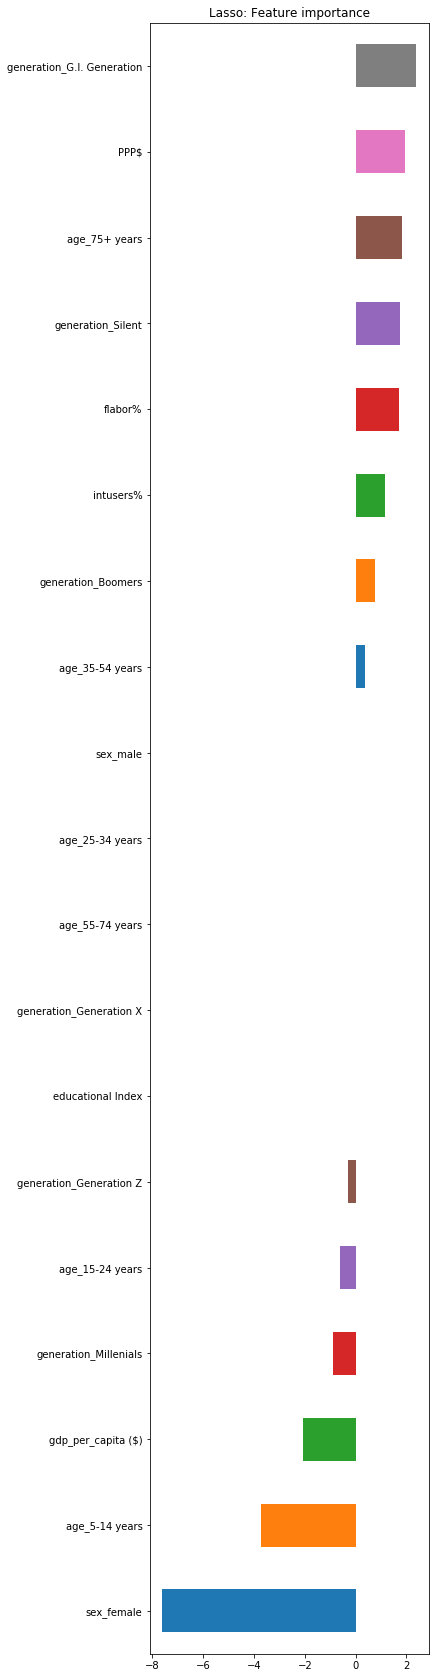

In [46]:
en_data = en_data.loc[:, en_data.columns != 'Y']

coef = pd.Series(final_model.coef_, index = X_columns)

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Lasso: Feature importance")

** AdaBoost Regression **

AdaBoost Regression is Boosting approach which is used to improve the performance of a normal decision tree. The idea behind it is that many individual weak learners who perform better than random guessing combined have good performance and reduce the bias of the prediction. 

In each iteration, Ada Boost finds the optimal feature to predict the output, evaluates the error and puts a strong emphasis on bad prediction in the next iteration.

It is interesting to see if suicide rates per capita can be estimated by GPD, PPP, educational index, internet users and women labour. Therefore, AdaBoost was used because it is easy to interpret its results. 

The following table shows the results of AdaBoost feature importance:

| Variable|Importance|
|------|------|
|  intusers%  |  27% |
|  flabor% | 27% | 
|   gdp_per_capita| 25% |
|   PPP  | 13% | 
|   educational Index  | 9% |

Below, a stump from the AdaBoost Regression can be seen. 

Like for Lasso mentioned, above the percentage of internet users and female in labour over 17 have positive correlation too suicides whilst GPD has a negative correlation. 

It is interesting to see that lower educational index seems to be related to lower suicide rates per capita. 

However, the score of the classifier is not good so in order to predict suicide rates more information are needed.

In [47]:
# Get suidable data
rf_data = all_Sui[['country','year','suicides/100k pop', 'gdp_per_capita ($)', 'PPP$', 'educational Index', 'intusers%', 'flabor%']]
rf_data = rf_data.dropna()
rf_cols = rf_data.columns
rf_cols = rf_cols[2:]

for col in rf_cols:
    if col == 'country':
        continue
    if col == 'year':
        continue
    rf_data[col] = rf_data[col].astype(float)

rf_data = rf_data.groupby(['country','year']).agg({'suicides/100k pop': np.sum, 'gdp_per_capita ($)': np.median, 'PPP$':np.median, 'educational Index':np.median, 'intusers%':np.median, 'flabor%':np.median}).reset_index()
rf_data = rf_data[['suicides/100k pop', 'gdp_per_capita ($)', 'PPP$', 'educational Index', 'intusers%', 'flabor%']]
rf_data.head()

,suicides/100k pop,gdp_per_capita ($),PPP$,educational Index,intusers%,flabor%
0,40.55,835.0,97.6,0.558,0.011169,39.7
1,43.62,1127.0,135.4,0.543,0.032197,39.9
2,77.43,793.0,144.9,0.542,0.048594,40.1
3,66.52,899.0,170.2,0.551,0.065027,40.4
4,69.81,1127.0,208.6,0.558,0.081437,40.5


In [48]:
'''
Ada Boost Regression
''' 

# Import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Get input output
y = rf_data['suicides/100k pop']
X = rf_data.loc[:, rf_data.columns != 'suicides/100k pop']

# Create 20% hold out set to estimate performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create model
model = AdaBoostRegressor(n_estimators=150, random_state = 24, learning_rate = 0.1)  # Run in paralell because 6 cores are availabe
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score_Train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

rms = sqrt(mean_squared_error(y_test, y_pred))

print('R Score Train', score_Train)
print('R Score Test', score_test)

R Score Train 0.22035186581375765
R Score Test 0.1170324902644333


In [49]:
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(X.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: intusers%            Importance: 0.27
Variable: flabor%              Importance: 0.27
Variable: gdp_per_capita ($)   Importance: 0.25
Variable: PPP$                 Importance: 0.13
Variable: educational Index    Importance: 0.09


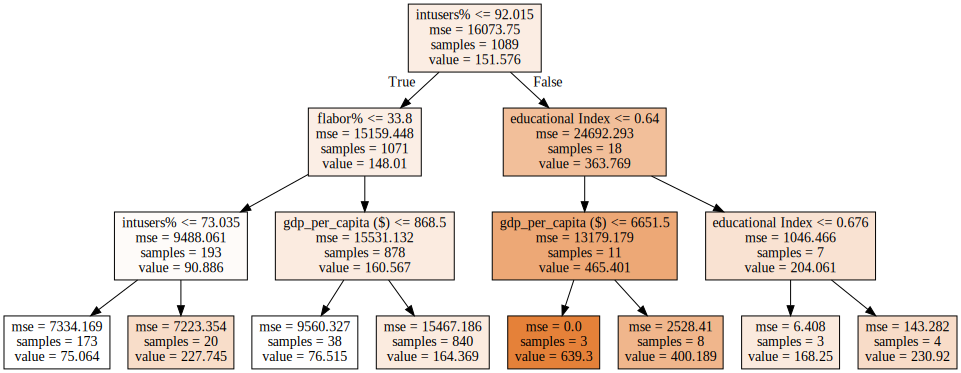

In [50]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source

tree = model.estimators_[0]

graph = Source(export_graphviz(tree,out_file=None, feature_names= list(X.columns),filled=True))

display(SVG(graph.pipe(format='svg')))

** Time Series Prediction **

It is interesting to get an idea of how suicides rate per capita for distinct countries will develop in the next few years. Therefore,  a linear trend model with a forgetting factor will be used in order to predict 5 years ahead along with 95% prediction interval. A one-step prediction will be used and the forgetting factor gives the most recent observations more weight in the forecasting than older observations so the model caches sudden changes better.

A Liner trend model is described the following way:

$$Y_{N+j} = f^{T}(j)\theta + \epsilon_{N+j}$$

Where N is the observative time, j is the relative time, $\theta$ is a vector of the parameters to be estimated,  $\epsilon_t$ is the noise component with $Var(\epsilon)=\sigma^2$ and $f(j)$ is a vector of forcast functions. A linear trend model needs to fulfill the following requrements:
 
$f(j+1)=Lf\left(j\right) =\left(\begin{array}{cc}1 & 0 \\1 & 1 \end{array} \right) f(j) \quad \quad f(0)=\left(\begin{array}{c}1\\0\end{array}\right)$

Therefore the model becomes:

$$
Y_{N} = x_N\theta_N +\epsilon, \quad x_N=\left(\begin{array}{cccc}1 & 1 & ...&1 \\-(N-1) & -(N+2) &...& 0 \end{array} \right)^T, \quad \theta = \left(\begin{array}{c} \theta_0\\\theta_1 \end{array} \right)
$$

To make a one step prediction the OLS estimates needs to be updated, for every new observation obtained:

$$
F_N=x^T_N\Sigma^{-1}x_N, \quad h_N=x^T_N\Sigma^{-1}Y, \quad \hat{\theta}_N=F_N^{-1}h_N
$$

Then the predicted value becomes:

$$
\hat{Y}_{N+1|N} =f^T(1)\hat{\theta}_N
$$

The prediction error for the predicted value is $\epsilon_{N+1}=Y_{N+1}-\hat{Y}_{N+1}$ and the corresponding prediction variance:

$$
Var\left[Y_{N+1}-\hat{Y}_{N+1}\right]= Var(\epsilon)\Sigma^2=\sigma^2diag(1/\lambda^{N-1},...,1/\lambda,1)
$$

where $\lambda$ is the forgetting factor. 

The 95\% confidence interval is then obteined by calculating:
$$
\hat{Y}_{N+1|N} \pm t_{0.25}(N-2)\hat{\sigma}\sqrt{1+f^T(1)F_N^{-1}f(1)}
$$

Where $\hat{\sigma_{N}}^2=\epsilon ^T\Sigma^{-1}\epsilon/(T-p), T>p$. Where T is the sum of the diagonal elements of $\Sigma^{-1}$, which is the number of essential observations estimation, and p=2 since we are estimating two parameters. Now there is enough information to predict the suicidal rates per capita for distinct Countries.

The described formulas were implemented which can be seen in the function one_step below. After a few trials, it was decided to use 0.65 as a forgetting factor. 

To perform time series prediction, the data needs to be validated which was done by only predicting the next five years from the last measurements of countries with sequential data (no missing values at the year range)


In [51]:
'''
Function for one step prediction
'''

def one_step(forget, data, year):
    n = len(data)
    diagonal = []
    for i in range((n-1), -1, -1):
        diagonal.append(forget**i)
    sigma = np.diag(diagonal)
    hatY = np.empty((1, n, ))
    hatY[:] = np.nan
    for g in range(3, (n+1)):
        F =  np.array([[0, 0],[0, 0]])
        h = np.array([0,0])
        h.shape = (2,1)
        for k in range(0, n):
            F = F + (forget**k)*np.matmul(np.transpose(np.matrix([1, -k])),np.matrix([1, -k]))
            h = h + (forget**k)* np.transpose(np.matrix([1, -k]))*data[g-k-1]
        theta = np.linalg.solve(F, h)
        hatY[0][g-1] = np.matmul(np.matrix([1, 1]), theta)
    x_N = np.empty((0,2), int)
    for i in range((-n+1), 1):
        x_N = np.append(x_N, np.array([[1,i]]), axis=0)
    F_N = np.matmul(np.matmul(np.transpose(x_N),sigma),x_N)
    h_N = np.matmul(np.matmul(np.transpose(x_N),sigma),data)
    theta_N = np.linalg.solve(F_N, h_N)
        
    x = np.array([[1, 1],[1, 2],[1, 3],[1, 4],[1, 5]])
    y_pred = np.matmul(x,theta_N)
    
    # Predict the next 5 years
    pred_curve = np.append(hatY, y_pred).tolist()
    y_pred = y_pred.tolist()
    year_PI = list(range(year[-1]+1,year[-1]+6))
    year = year + year_PI
    pred_curve = pred_curve[2:]
    year = year[2:]
    
    for i, val in enumerate(pred_curve):
        if val < 0:
            pred_curve[i] = 0
    
    #Find Sigma to estimate PI
    residual = np.array(data) - hatY
    residual = np.delete(residual, np.s_[:2], 1)
    sigma_2 = np.matmul(residual, np.transpose(residual))
    
    #Calcuclate 95% prediction interval
    lower = []
    upper = []
    for j in range(1,6):
        var = float(sigma_2 *(1+ np.matmul(np.matmul(np.matrix([1, j]),np.linalg.inv(F_N)), np.transpose(np.matrix([1, j])))))
        conf = 1.6*np.sqrt(var)
        lower_test = y_pred[j-1]-conf
        if lower_test < 0:
            lower_test = 0
        lower.append(lower_test)
        upper.append(y_pred[j-1]+conf)
    

    return year, year_PI, pred_curve, lower, upper

In [52]:
'''
Get nicer data
'''
ts = df[['country', 'year', 'sex', 'suicides/100k pop']]
ts = ts.rename(index=str, columns={"country": "Country", "year": "Year", "sex": "Sex", "suicides/100k pop":"Suicides/100k"})


# Prediction for Genders
ts = ts.groupby(['Country','Year','Sex'])['Suicides/100k'].mean().reset_index(name = 'Suicides/100k')

# Total for all countries
total_y = ts.groupby(['Year','Sex'])['Suicides/100k'].mean().reset_index(name = 'Suicides/100k')
total_y['Country'] ='All'

# join the  Total frame
data_temp = pd.concat([ts, total_y],  sort = True)

# Get sum of genders
total = data_temp.groupby(['Country','Year'])['Suicides/100k'].mean().reset_index(name = 'Suicides/100k')
total['Sex'] = 'All'

# join the  Total frame
data = pd.concat([data_temp, total],  sort = True)
data = data.sort_values(by = ['Country'])

In [53]:
'''
Create dataFrame with prediction
'''
true_df = []
pred_df = []
upper_df = []
lower_df = []


contries = data.Country.unique().tolist()
sex = data.Sex.unique().tolist()

for c in contries: 
    for s in sex:
        temp = data.loc[(data['Country'] == c) & (data['Sex'] == s)]
        # make sure it is sorted for time series pred
        tempSort = temp[['Suicides/100k','Year']].sort_values('Year').reset_index(drop=True)
        years = tempSort['Year'].unique().tolist()
        end_year = years[-1]+1
        begin_year = end_year - len(years)
        test_years = list(range(begin_year,end_year))
        s_s = tempSort['Suicides/100k'].tolist()
        y_s  = tempSort['Year'].tolist()
        if years == test_years:
            suicides = tempSort['Suicides/100k']
            try:
                year, year_PI, pred_curve, lower, upper = one_step(0.65, s_s, y_s)
            except:
                continue
            for i, y in enumerate(y_s):
                true_df.append({'Country': c, 'Sex': s, 'Year':y_s[i], 'Suicides/100k':s_s[i]})
            for i, y in enumerate(year):
                pred_df.append({'Country': c, 'Sex': s, 'Year':year[i], 'Suicides/100k':pred_curve[i]})
            for i, y in enumerate(year_PI):
                upper_df.append({'Country': c, 'Sex': s, 'Year':year_PI[i], 'Suicides/100k':upper[i]})
                lower_df.append({'Country': c, 'Sex': s, 'Year':year_PI[i], 'Suicides/100k':lower[i]})

            
true = pd.DataFrame(true_df)
pred = pd.DataFrame(pred_df)
upper = pd.DataFrame(upper_df)
lower = pd.DataFrame(lower_df)


true.to_csv('true.csv', index=False)
pred.to_csv('pred.csv', index=False)
upper.to_csv('upper.csv', index=False)
lower.to_csv('lower.csv', index=False)

**Creating datasets for explanatory analysis**

In [83]:
'''
Welcoming data
'''

#Continuous data

con_welcome = df_all_year.groupby(['year'])['suicides_no'].sum().reset_index()
con_welcome.to_csv('con_welcome.csv', index=False)


#All data
all_welcome = df.groupby(['year'])['suicides_no'].sum().reset_index()
all_welcome.to_csv('all_welcome.csv', index=False)



In [87]:
'''
Get data for age
''' 

# Age

#continuous data 
con_age = df_all_year.groupby(['country','age','year']).agg({'suicides/100k pop': np.sum, 'population': np.sum}).reset_index()

total_age = df_all_year.groupby(['year','age']).agg({'suicides/100k pop': np.sum, 'population': np.sum}).reset_index()
total_age['country'] ='All'

con_age = pd.concat([con_age, total_age],  sort = True)
con_age = con_age.sort_values(by = ['country'])

con_agepop = con_age[['year','country','age','population']]
con_agesui = con_age[['year','country','age','suicides/100k pop']]

con_agepop.to_csv('con_agepop.csv', index=False)
con_agesui.to_csv('con_agesui.csv', index=False)

# All data
all_age = df.groupby(['country','age','year']).agg({'suicides/100k pop': np.sum, 'population': np.sum}).reset_index()

total_age = df.groupby(['year','age']).agg({'suicides/100k pop': np.sum, 'population': np.sum}).reset_index()
total_age['country'] ='All'

all_age = pd.concat([all_age, total_age],  sort = True)
all_age = all_age.sort_values(by = ['country'])

all_agepop = all_age[['year','country','age','population']]
all_agesui = all_age[['year','country','age','suicides/100k pop']]

all_agepop.to_csv('all_agepop.csv', index=False)
all_agesui.to_csv('all_agesui.csv', index=False)

# 4. Genre

**Which genre of data story did you use?**

Throughout this project **annotated graphs**  were utilized.  One could argue that some combination of **animation/video** and **annotated graphs** was used in a couple of places. 

**Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in [Segal and Heer](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf)). Why?**

 * **Visual Structuring**
     * Establishing shot/splash screen
         * Communicating the overall structure of the story is considered important, because there is a lot of data, and allowing the user to understand the bigger picture is critical. It is believed that the first visualization serves as an establishing shot for the explanatory notebook.
 * **Highlighting**
     * Motion
         * It is good to use motion to direct the viewer's attention to the *"leaderboard"* of the leading countries in suicide rates over the years. Bar chart *" races"* are quite a popular visualization tool to show these kinds of *leaderboard changes* and the leaderboard serves its purpose quite well. 
     * Zooming
         * In case of the bubble chart, a zooming feature is utilized, so the viewer gains a perspective of the differences in sizes of bubbles. It is likely to help the user immerse themselves a more profound understanding of the contributions between different groups (especially countries).
 * **Transition Guidance**
     * Animated transitions
       * Used in the barchart race for the user to be able to keep an eye on different countries during the race.

**Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in [Segal and Heer](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf)). Why?**

 * **Ordering**
   * Random access
     * After the establishing shot, the user is allowed to explore the different sections of the notebook freely. This is convenient for the user to understand the story behind these suicide rates and the story from each group.
 * **Interactivity**
   * Hover highlighting/Details
     * It is important to allow the user to either get further details on demand by highlighting or clarify information as in the bubble charts. 
   * Filtering/Selection/Search
     * It is essential to allow the user to choose their own interest areas in the presented data. For example, filter visualizations for their home country in the visualizations.
 * **Messaging**
   * Captions/Headlines
     * As the story has a lot of individual groups that are to be investigated, the visualizations have to communicate some amount of the information depicted in them through captions and headlines, e.g. titles.
   * Annotations
     * Is it essential to thoroughly annotate the presented information as there is a lot of details which have many aspects.
   * Introductory text
     * The notebook is quite sectioned. The viewer is introduced to a new section for each visualization which emphasizes the importance of it.

# 5. Vizualization

**Explain the visualizations you've chosen and why they are right for the story you want to tell.**

The viewer is invited into our notebook with an annotated graph and an overview of the suicide rates over the 30 years.  One could argue that this annotated graph is a **animation/video** because it is a line graph that animates over the years and then becomes an area graph at the end, displaying text in the middle of it.  This was considered a **clear starting point** of the narrative as it gives a overview to introduce our dataset [(Segel, Heer)](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf).

After a short explanation of the dataset in words the World Map is shown. The maps shows an overview of the dataset and gives a feeling of the data and comparison of countries for each year. Hovering over each country shows the total suicide rate in that country in the chosen year.

Next,  the user gets to an annotated graph in the form of a *bar chart race*. This visualization shows how the leading countries in suicide rates have changed over the years.  For each passing year, the sum of the average suicide rates over 100,000 of the population within each country for each year. The user can select how many countries they can view and they can also start the race over with the press of a button.
The race starts over if the number of countries is changed.

Then, the user is allowed to see the distributions between groups, i.e. continents, countries, genders, age groups, and generations, with choice between two types of annotated graphs. One is a bubble chart, and the other is a simple bar chart. 
For the bubble-chart, the area of each bubble is in relation to the amount of suicides (whether *total* or *per 100,000 of the population* is selected).

Then the user sees the correlation between suicide rates within countries and other factors such as GDP per capita and Internet usage using an annotated graph in the form of a line chart.

Finally, the user is introduced to line chart where the suicide rates for female, male and both genders for each country over the next 5 years is predicted and 95% prediction intervals are included.  The true suicide rates curves are included to give the user some idea about the performance of the prediction as time passes. The viewer can hover over the prediction curve to see the exact predictions each year. This is a perfect closure which gives the viewer feeling about the suicide development over the next few years for a country of his chose.

The animation/video in the form of an annotated line/area graph that animates is essential to create a clear starting point for the exploratory visualization.

The genre of **annotated graphs** was chosen as there is a lot of features within this dataset that is worth exploring. This genre is used in order to allow some interaction from the user which enables the user to view data and get information of  his interest.

# 6. Discussion

**Think critically about your creation**

**What went well?**


**What is still missing? What could be improved?, Why?**

# 7. Contributions

You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

It is not OK simply to write "All group members contributed equally".

You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
It is not OK simply to write "All group members contributed equally".
Make sure that you use references when they're needed and follow academic standards.

| Member|xxx|xxx|xxx|
|------|------|
|  Gudlaug   |  | |  | 
|  Gudrun Anna Atladottir |  |  |  |
|   Matthias |  |  |   |

**Guðlaug** s185717: Mapping master

**Guðrún** sXXXXXX: Exploratory, machine learning master

**Matthías** s182306: Plotting master

# 8. References

Madsen, Henrik. 2008, *Time Series Analysis}* Chapman & Hall/CRC, London.

T. Hastie, R. Tibshirani, and J. Friedman. 2001, *The Elements of Statistical Learning*. Springer Series in Statistics Springer New York Inc., New York.

H, Jeffrey, S, Edward. 2010, *Narrative Visualization: Telling Stories with Data*. Stanford University, Stanford. 
